## INSAID TELECOM Data Analysis project


<a id="#section1"></a>
### Problem Statement
InsaidTelecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India

In this consulting assignment, Team-1011 build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. This detail analysis will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

<a id=#section2></a>
## Importing Packages


In [1]:
#Imports
import numpy as np
import pandas as pd
import pandas_profiling
import mysql.connector
from mysql.connector import Error

import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

### We are provided with 3 data inputs
- events data set in CSV format
- gender_age data and phone_brand_device_model data are to be fetched from database server


### Fetching the records from database server
- We are writing a function to repeat the same for both gender, phonebrand data
- This is a one time activity to read the data from the tables in the database server
- we will use mysql connector agent for fetching the record.
- we have to install that package using the command ***!pip install mysql-connector-python***

In [2]:
#----------------------------------------------------------------------------------#
#!pip install mysql-connector-python
# Write a function to connec to database and get the records
# This function will take the query and connect to the Capstone1 database, runs the query and gets the records as dataframe
#----------------------------------------------------------------------------------#

def getrecords_from_db_to_df(query):
    try:
        connection = mysql.connector.connect(host='cpanel.insaid.co',
                                             database='Capstone1',
                                             user='student',
                                             password='student')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            df =  pd.read_sql_query(query, connection)
            #record = cursor.fetchone()
            print("output is done")
            return  df
    except Error as e:
        print("Error while connecting to MySQL", e)
    finally:
        if (connection.is_connected()):
            connection.close()
            print("MySQL connection is closed")
#----------------------------------------------------------------------------------#
#                                  Function end
#----------------------------------------------------------------------------------#

### Getting the data


In [3]:
#Now fetch records using query
query = "select * from gender_age_train"
df_gender_age = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


In [4]:
query = "select * from phone_brand_device_model"
df_phone_brand_device_model = getrecords_from_db_to_df(query)

Connected to MySQL Server version  5.6.47-cll-lve
output is done
MySQL connection is closed


In [ ]:
#df_phone_brand_device_model.to_csv('device_brand.csv')

In [ ]:
#df_gender_age.to_csv('gender_age.csv')

In [5]:
df_phone_brand_device_model

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [6]:
df_gender_age

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


#### Read events data from CSV

In [7]:
# Read and check the records
df_events = pd.read_csv('.\events_data.csv')
df_events.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


#### Let us write a function to find the missing values along with Percentage

In [282]:
def missing_values_with_percent(data):
    total_missed_data = data.isnull().sum().sort_values(ascending = False)
    print(total_missed_data)
    percent_missed_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print(percent_missed_data)
    return pd.concat([total_missed_data, percent_missed_data*100], axis=1, keys=['Total Missed', 'Missed %'])

#### Let us study each dataset now

## Events Data

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [10]:
df_events.shape

(3252950, 7)

In [11]:
df_events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [12]:
missing_values_with_percent(df_events)

,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
state,377,1.158948
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


In [13]:
#profile_events = pandas_profiling.ProfileReport(df_events, minimal = True)
#profile_events.to_file("events_pre_profiling.html")

In [14]:
from IPython.display import IFrame
IFrame(src='events_pre_profiling.html', width=1000, height=500)

### Univariate Analysis

In [15]:
##Let us check each parameter
# State, city
# Longitude, Latitude
# Age
# Age group
# distribution of events
# distribution of devices

### State Analysis, City Analysis, State,City Analysis

In [16]:
df_events['state'].unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

In [17]:
df_events['state'].nunique()

32

In [18]:
def change_barwidth(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [19]:
def plotvalues(ax, fsize=12):
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=fsize)

In [20]:
#headortail : 1 for head, 0 for tail
#count - how many you want to view
#label - column name i.e. state, city etc
def plotbarplot(data, label, count, xlabel, ylabel, headortail):
    if(headortail == 1):
        item_count = data[label].value_counts().head(count)
    else:
        item_count = data[label].value_counts().tail(count)
    sns.set(style="darkgrid")
    ax = sns.barplot(item_count.index, item_count.values, alpha=0.9)
    sns.set(rc={'figure.figsize':(30, 20)})
    plt.title('Frequency Distribution of ' + xlabel, fontsize=30)
    plt.ylabel('Number of Occurrences of' + ylabel,  fontsize=30)
    plt.xlabel('state', fontsize=20)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    change_barwidth(ax, 0.3)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=25)
    plt.tight_layout()
    plt.show()

In [21]:
def plotchart(feature, type, df, count, xlabel, ylabel, title):
    sns.set(font_scale=1.2)
    df[feature].value_counts()[:count].plot(kind=type, figsize=(7, 6), rot=0);
    plt.xlabel(xlabel, labelpad=14)
    plt.ylabel(ylabel, labelpad=14)
    plt.xticks(rotation=60)
    plt.title(title, y=1.02);
    plt.show()

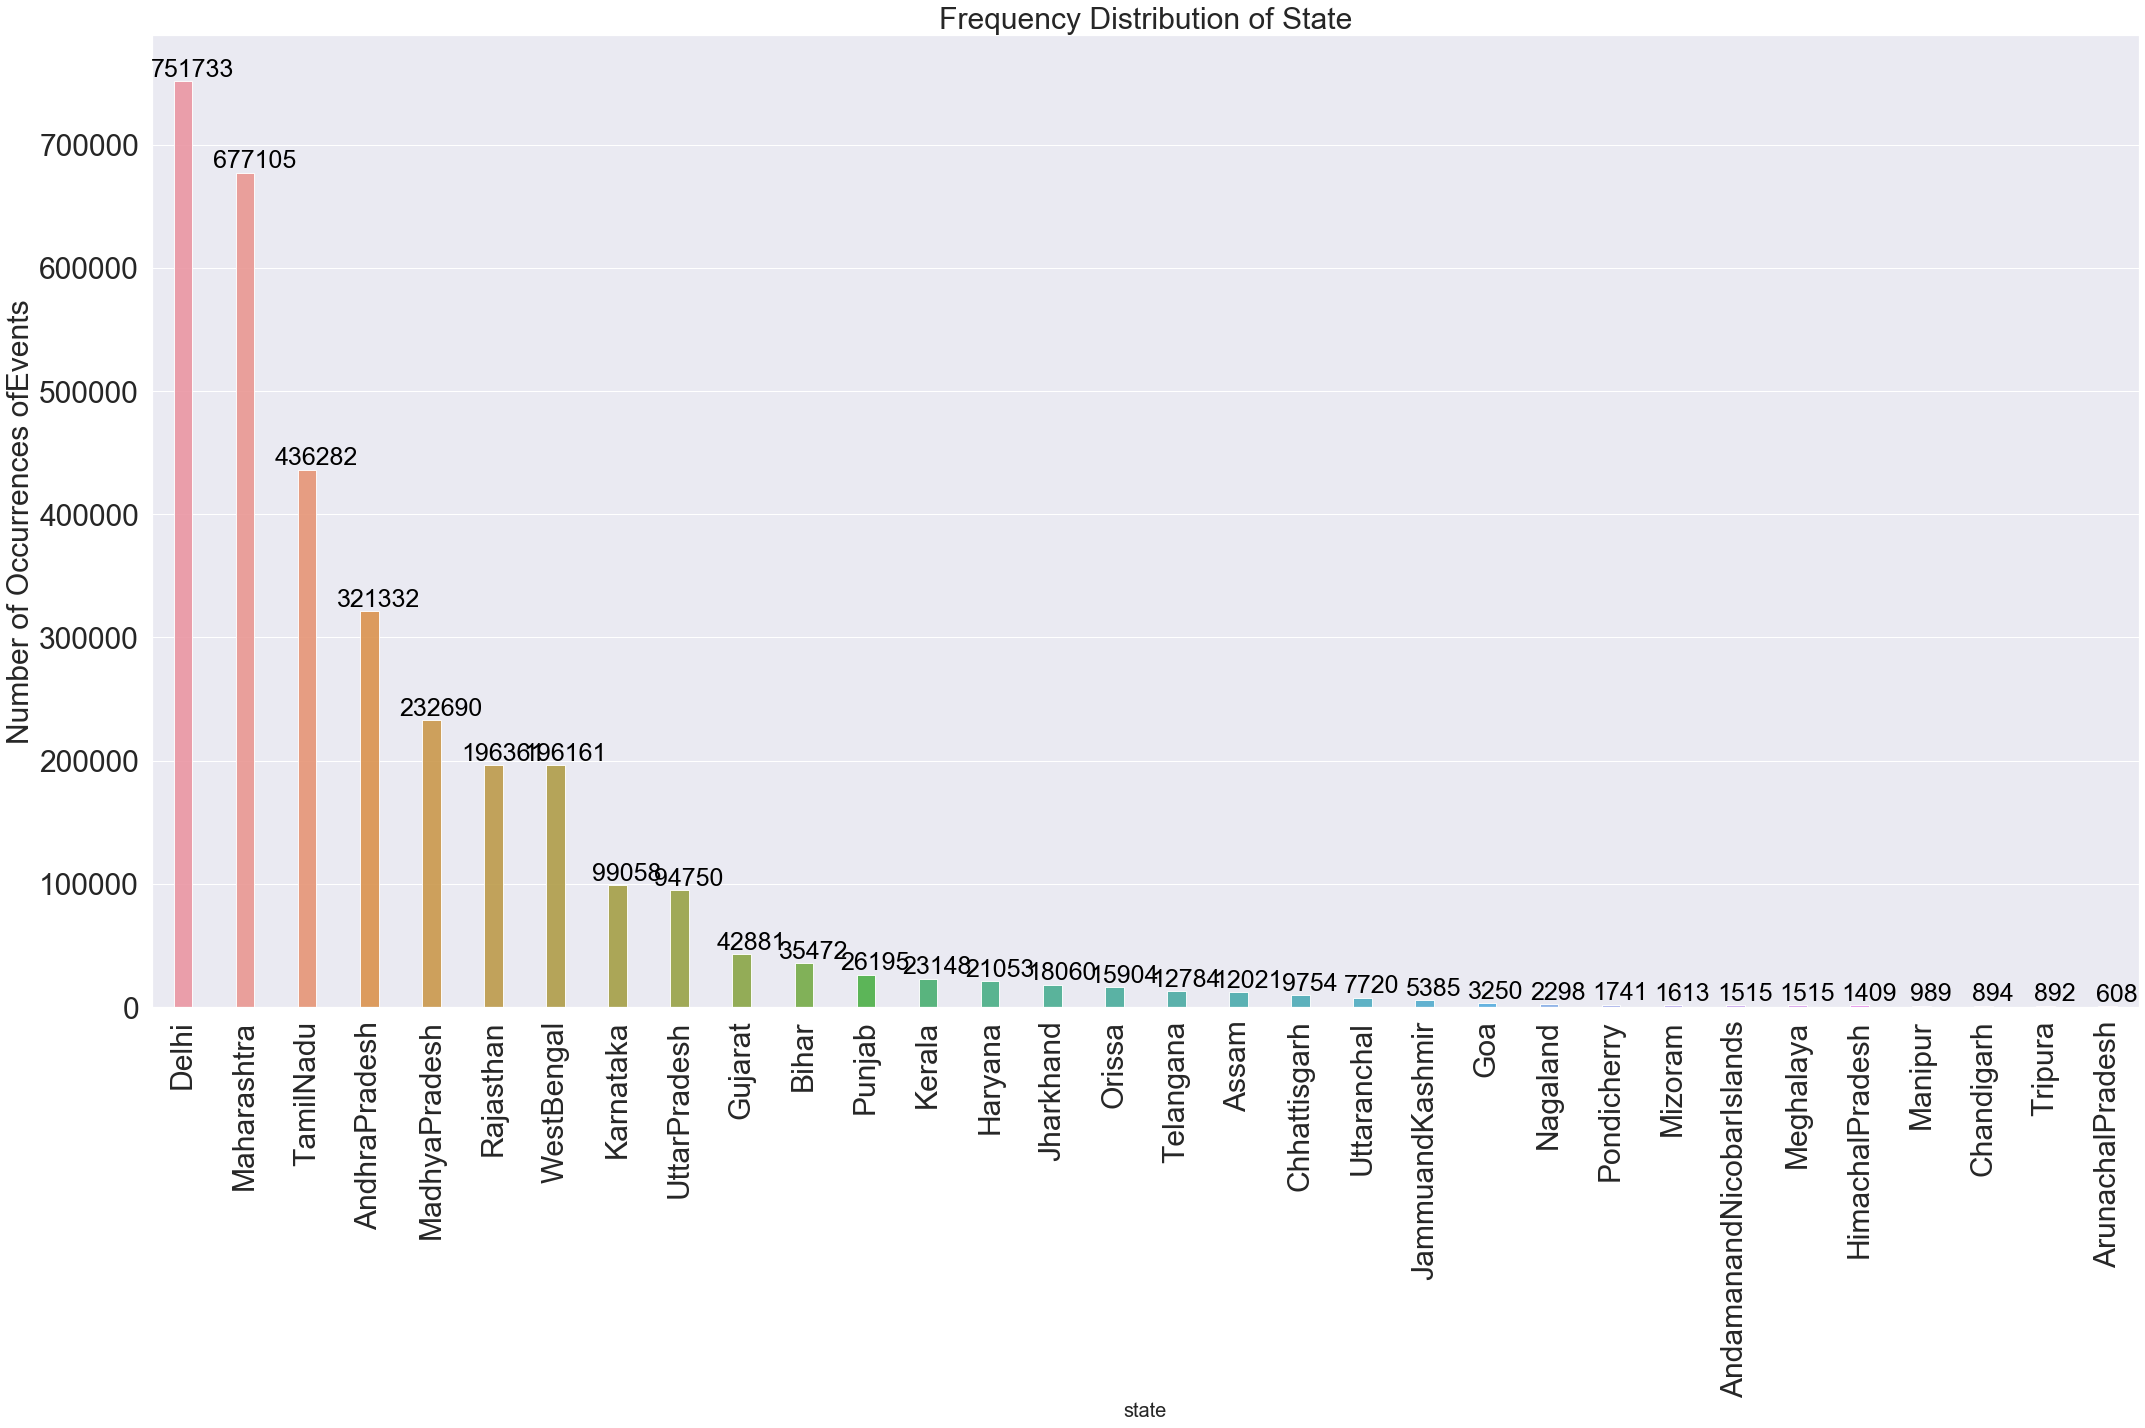

In [23]:
plotbarplot(df_events, 'state', 32, 'State', 'Events', 1 )

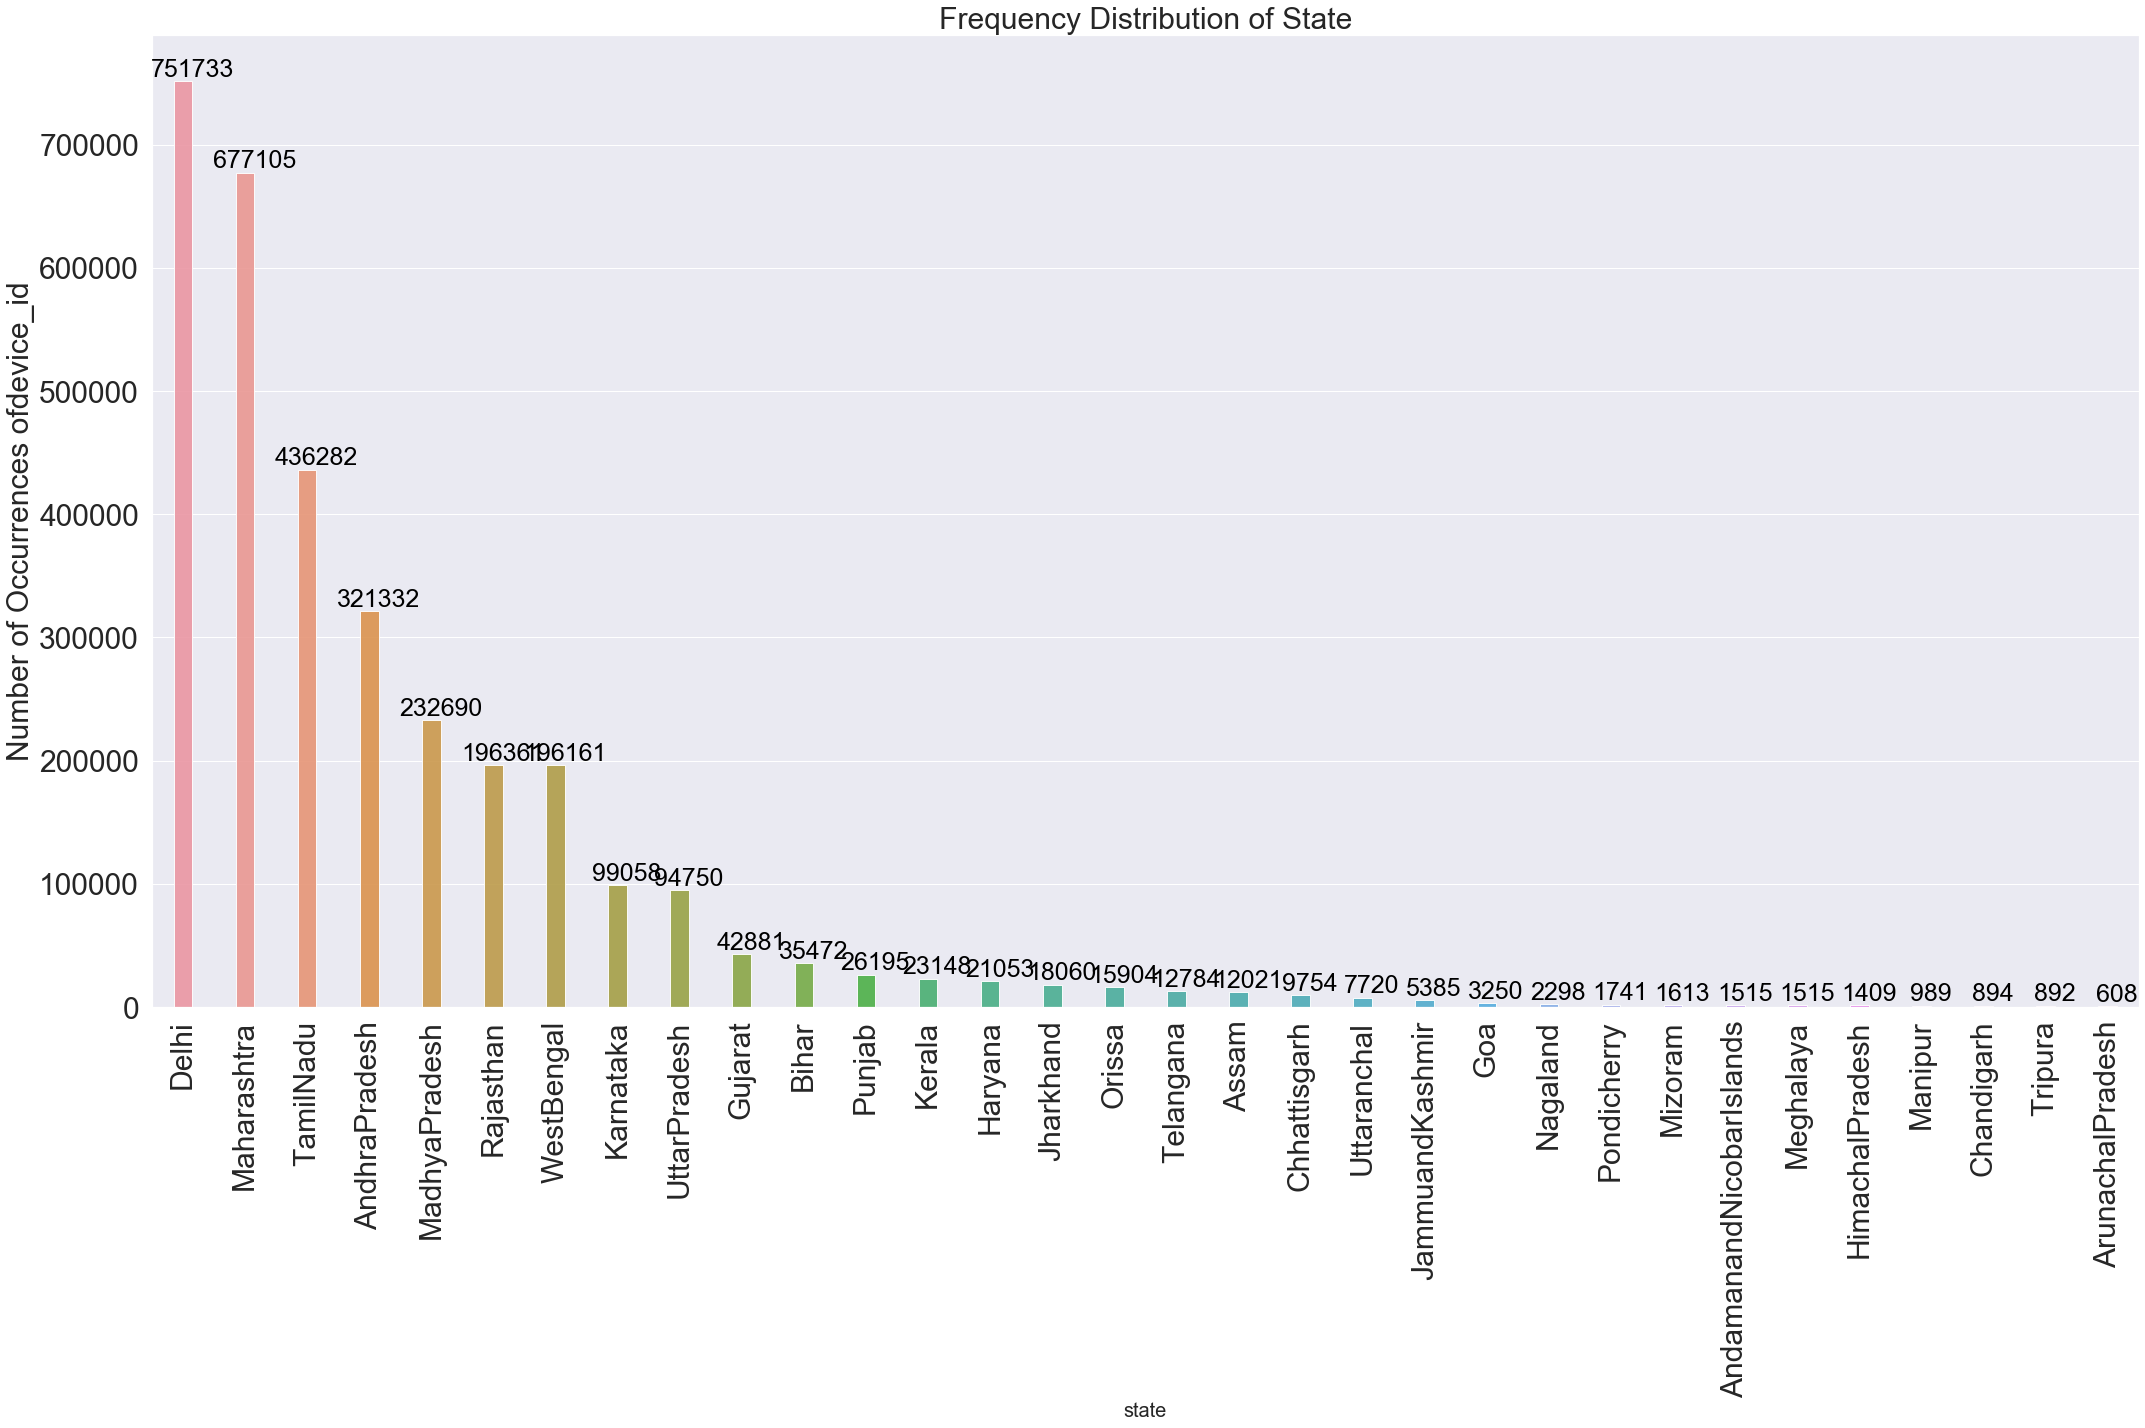

In [24]:
plotbarplot(df_events, 'state', 32, 'State', 'device_id', 1 )

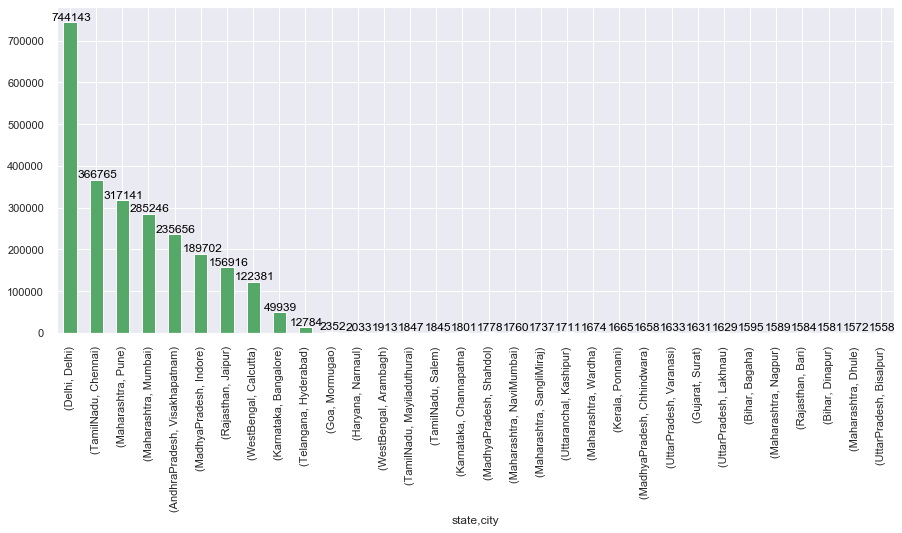

In [25]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby(['state','city'])['device_id'].count().sort_values(ascending=False)[:32].plot(kind='bar', color='g')
plotvalues(ax)

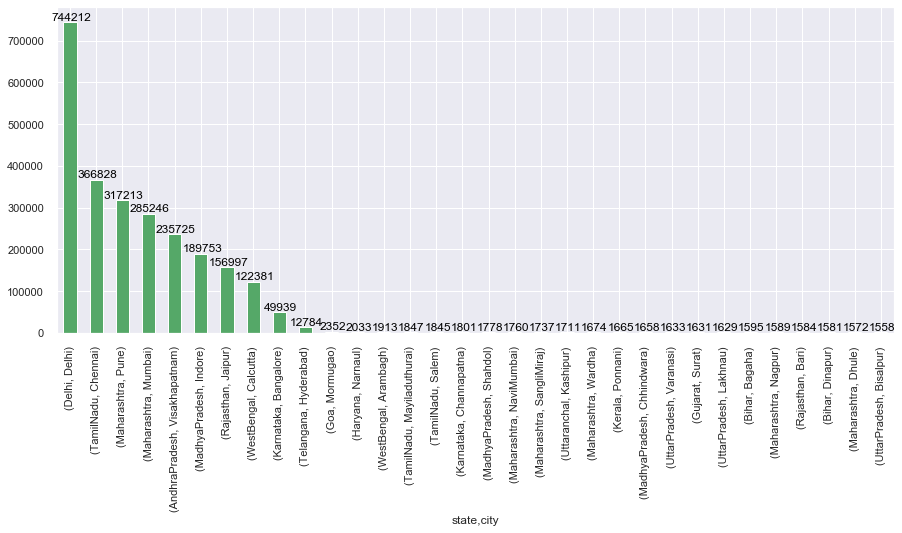

In [26]:

plt.figure(figsize = (15, 6))
ax = df_events.groupby(['state','city'])['event_id'].count().sort_values(ascending=False)[:32].plot(kind='bar', color='g')
plotvalues(ax)

In [164]:
df_events.groupby('state')['event_id'].count().sort_values(ascending=False)

state
Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur       

Text(0.5, 1.0, 'event distribution with state')

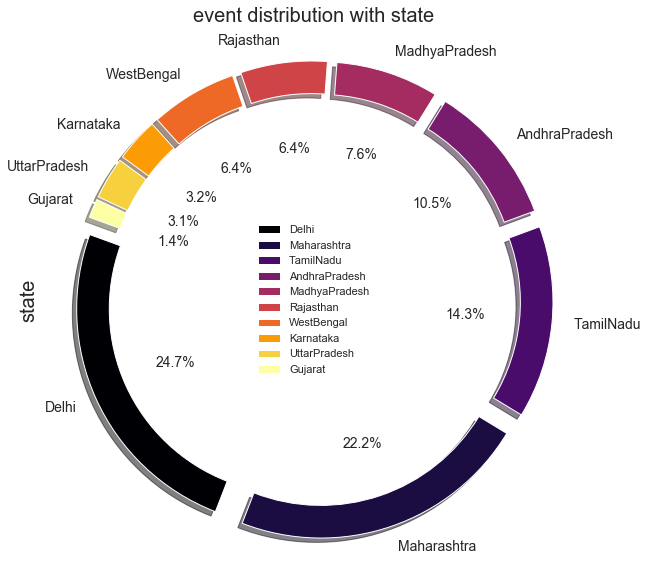

In [216]:
space = np.ones(10)/10
df_events['state'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=160, figsize=(10,10), cmap='inferno', legend=True)
labels = df_events['state']
plt.legend(loc=10)
plt.ylabel('state',fontsize=20)
plt.title('event distribution with state',fontsize=20)

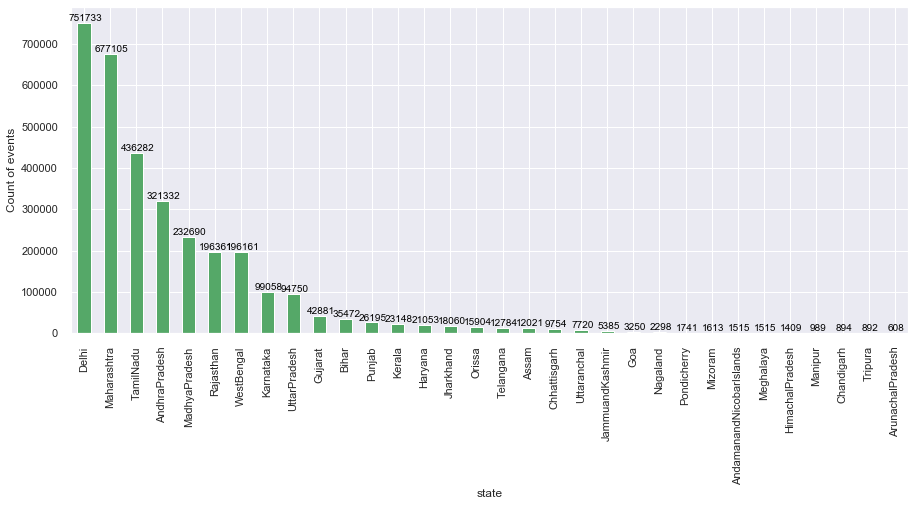

In [28]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby('state')['city'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count of events')
plotvalues(ax, 10)
plt.show()

In [29]:
df_events.groupby('city')['event_id'].count().sort_values(ascending=False)

city
Delhi               744276
Chennai             366875
Pune                317276
Mumbai              285246
Visakhapatnam       235772
                     ...  
Ramachandrapuram       279
Sirhind                269
Tadepallegudem         264
Brajrajnagar           263
Kovilpatti             258
Name: event_id, Length: 933, dtype: int64

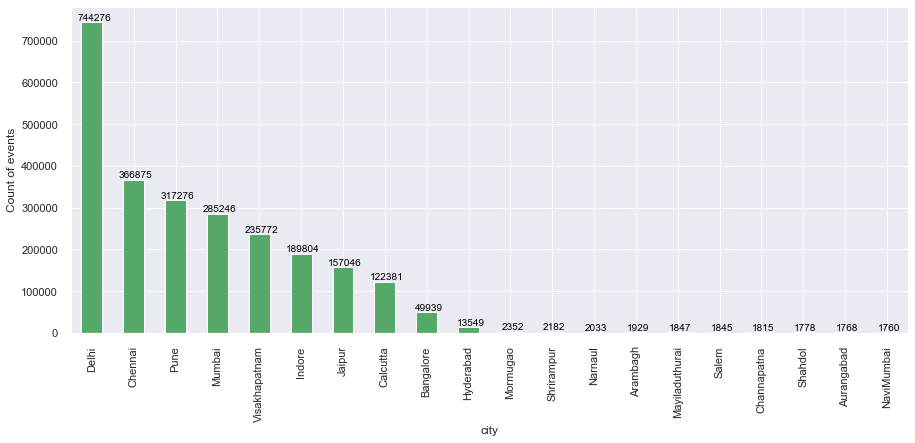

In [30]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby('city')['event_id'].count().sort_values(ascending=False)[:20].plot(kind='bar', color='g')
plt.ylabel('Count of events')
plotvalues(ax, 10)

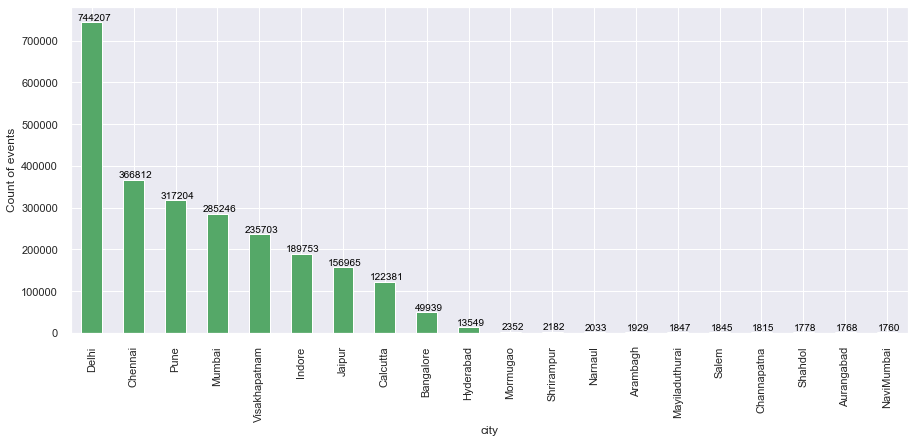

In [31]:
plt.figure(figsize = (15, 6))
ax = df_events.groupby('city')['device_id'].count().sort_values(ascending=False)[:20].plot(kind='bar', color='g')
plt.ylabel('Count of events')
plotvalues(ax, 10)

#### Observations
1. Almost all the events are generated the states
  **Delhi, Maharashtra, TamilNadu, AndhraPradesh, MadhyaPradesh, Rajasthan, WestBengal, Karnataka, UttarPradesh, Gujarat, Bihar**
2. Delhi has highest, followed by Maharastra, TamilNadu
3. Most of Northern East states are not having phone activity (very few events generated) as can be observed from the right side of the graph

In [32]:
city_count = df_events['city'].value_counts().nunique()
city_count

635

### City Analysis

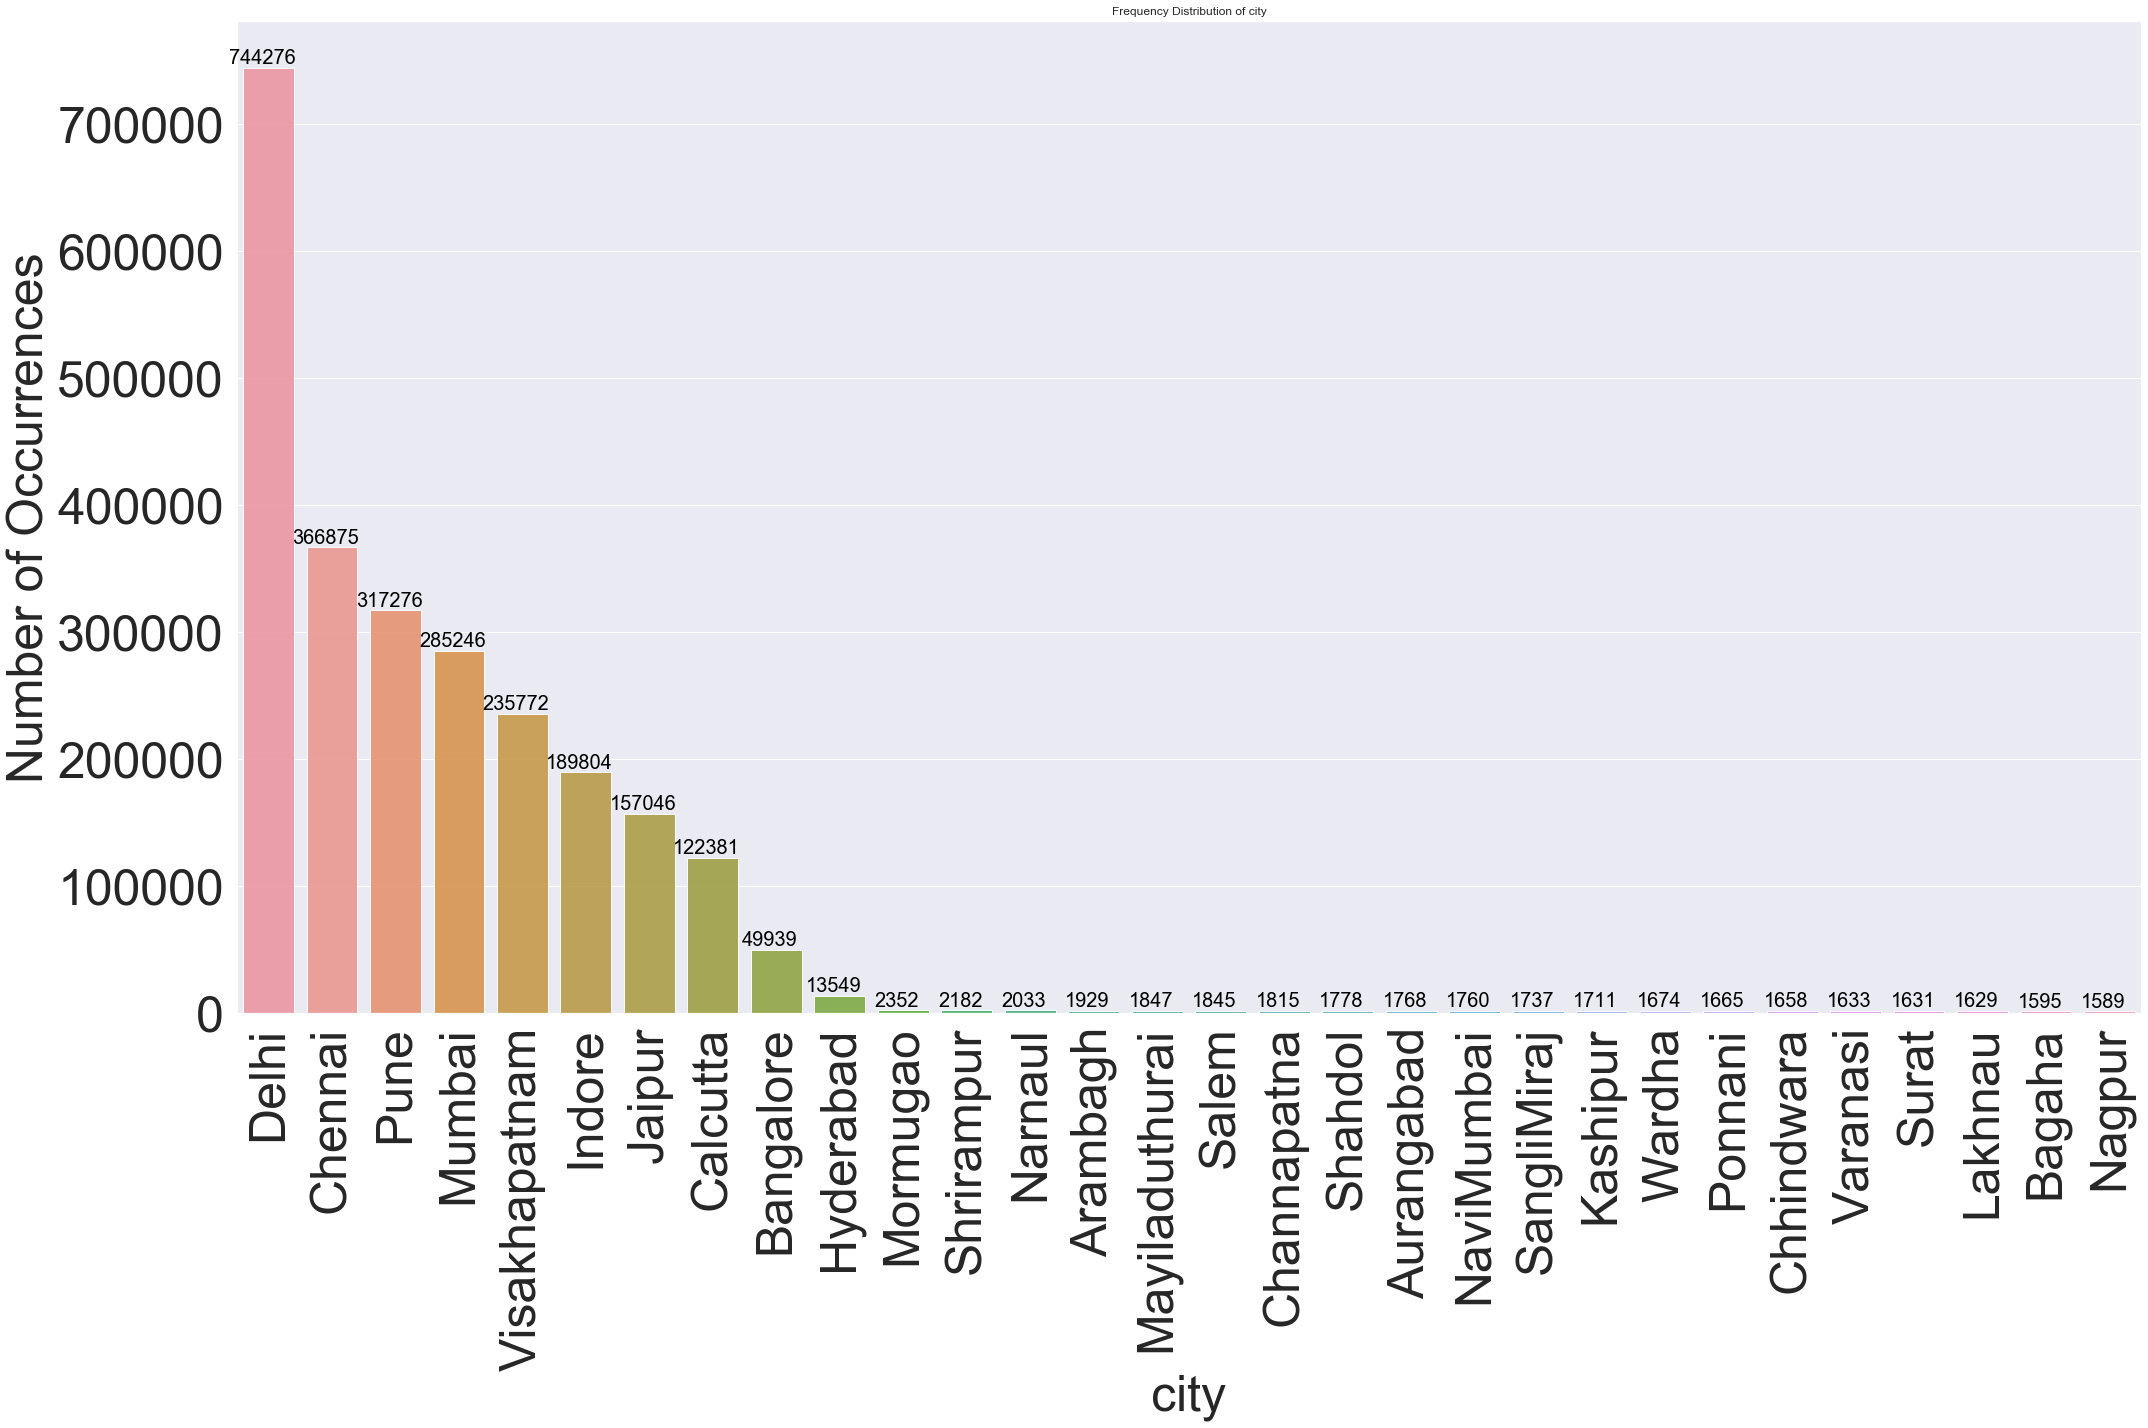

In [33]:
#sns.set(font_scale=3)
city_count = df_events['city'].value_counts().head(30)
#city_count = df_events.city('Channapatna','Gangarampur', 'Arambagh').value_counts().head(10)
sns.set(style="darkgrid")
ax = sns.barplot(city_count.index, city_count.values, alpha=0.9)
sns.set(rc={'figure.figsize':(30, 20)})
plt.title('Frequency Distribution of city')
plt.ylabel('Number of Occurrences', fontsize=50)
plt.xlabel('city', fontsize=50)
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plotvalues(ax, 20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'city distribution')

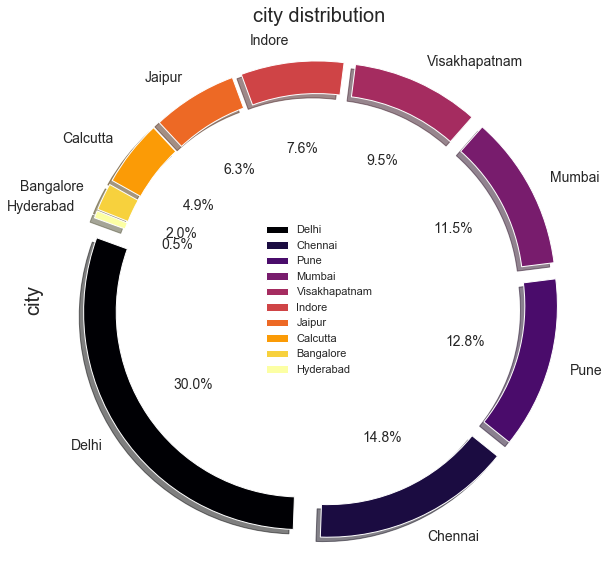

In [221]:
space = np.ones(10)/10
df_events['city'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.15), shadow=True, 
                                           startangle=160, figsize=(10,10), cmap='inferno', legend=True)
labels = df_events['city']
plt.legend(loc=10)
plt.ylabel('city',fontsize=20)
plt.title('city distribution',fontsize=20)

In [61]:
df_events[df_events['state'].isnull()]['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

### Finding outliers in the events data

### Latitude and Longitude

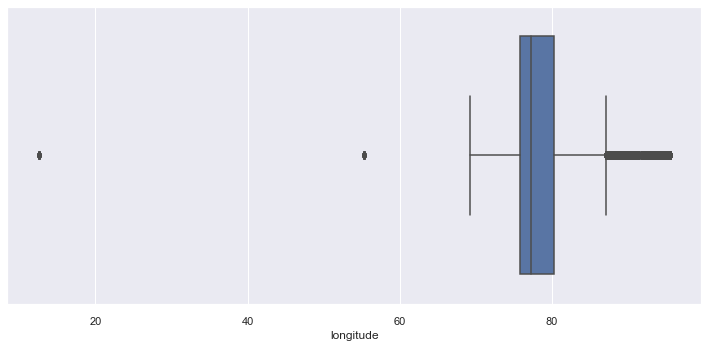

In [44]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df_events['longitude'])
plt.tight_layout()
plt.show()

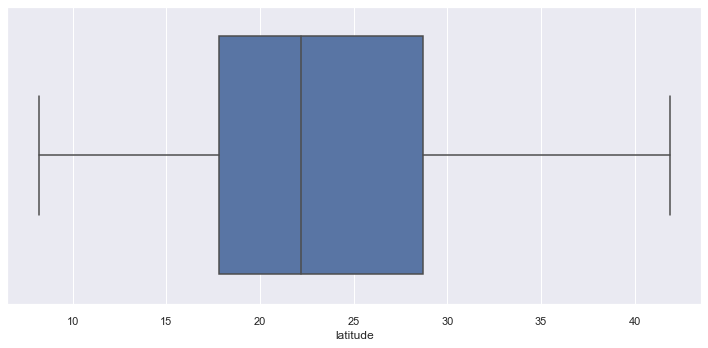

In [45]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df_events['latitude'])
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

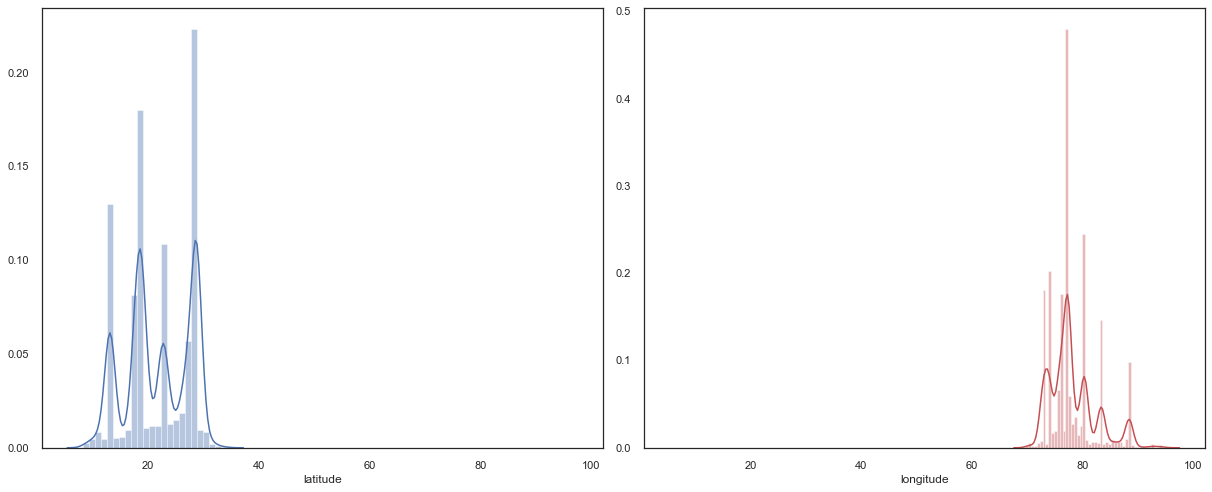

In [46]:
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7), sharex=True)
sns.set(rc={'figure.figsize':(12, 8)})
sns.distplot(df_events.latitude.head(8000), color="b", ax=ax1)
sns.distplot(df_events.longitude.head(8000), color="r", ax=ax2)
plt.tight_layout()
plt.show()

#### Observations

- Total Records are 3252950 and Total columns are 7
- 3 objects and 4 numerical values are present
- The following are missing values in the data
    - device_id
    - latitude
    - longitude
    - state

## Gender and Age Data

In [47]:
df_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [48]:
df_gender_age.shape

(74645, 4)

In [49]:
df_gender_age.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [50]:
df_gender_age.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [51]:
#profile_gender_age = pandas_profiling.ProfileReport(df_gender_age)
#profile_gender_age.to_file("Gender_Age_pre_profiling.html")
IFrame(src='Gender_Age_pre_profiling.html', width=1000, height=500)

In [52]:
df_gender_age.device_id = df_gender_age.device_id.astype(float)
df_gender_age.dtypes

device_id    float64
gender        object
age            int64
group         object
dtype: object

In [53]:
df_gender_age['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

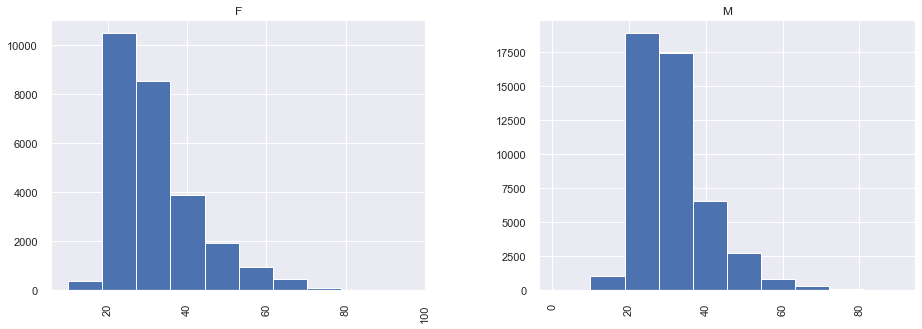

In [106]:
ax = df_gender_age.hist(by='gender',column = 'age',figsize=(15,5))
plt.show()

In [67]:
print("distinct age_group:", set(df_gender_age['group']))

distinct age_group: {'M23-26', 'F27-28', 'F24-26', 'M39+', 'M32-38', 'M27-28', 'F33-42', 'F43+', 'F23-', 'M22-', 'F29-32', 'M29-31'}


In [68]:
df_gender_age.groupby('group')['device_id'].count()

group
F23-      5050
F24-26    4190
F27-28    3118
F29-32    4628
F33-42    5561
F43+      4194
M22-      7488
M23-26    9605
M27-28    5445
M29-31    7309
M32-38    9476
M39+      8581
Name: device_id, dtype: int64

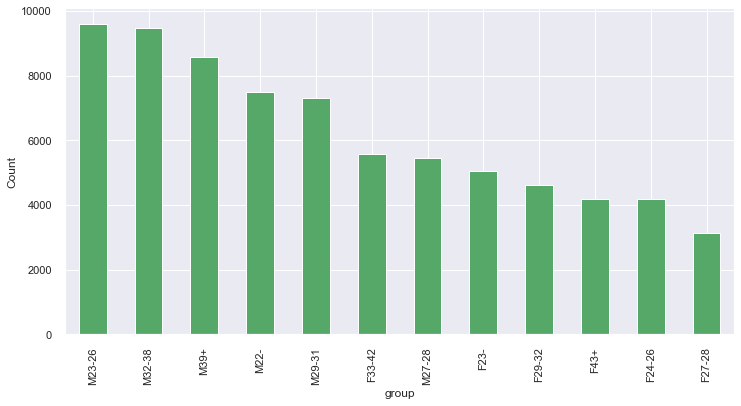

In [69]:
plt.figure(figsize = (12, 6))
df_gender_age.groupby('group')['device_id'].count().sort_values(ascending=False).plot(kind='bar',color='g')
plt.ylabel('Count')
plt.show()

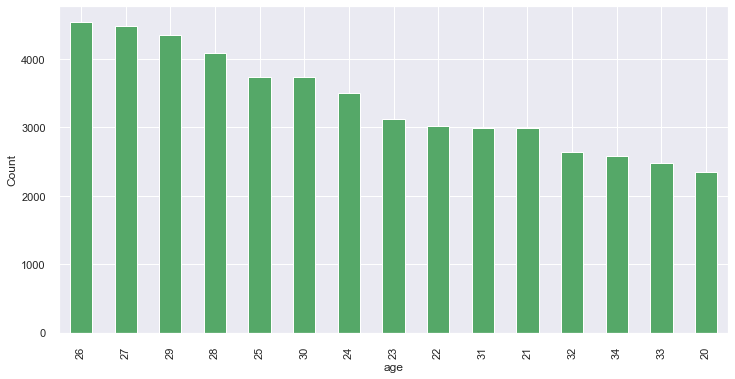

In [107]:

plt.figure(figsize = (12, 6))
df_gender_age.groupby('age')['device_id'].count().sort_values(ascending=False)[:15].plot(kind='bar',color='g')
#df_gender_age.groupby('group')['device_id'].count().sort_values(ascending=False).plot(kind='bar',color='g')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Age')

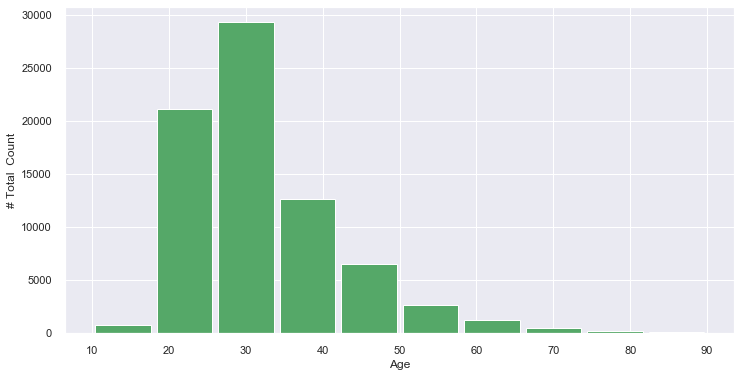

In [111]:
plt.figure(figsize=(12,6))
range = (10,90)
plt.hist(df_gender_age['age'], 10, range, color= 'g', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Total  Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

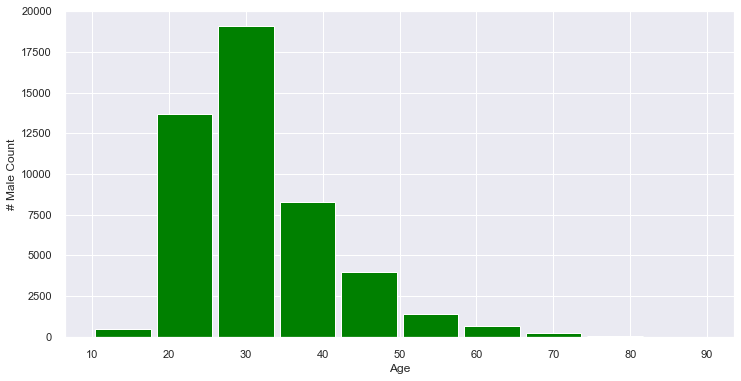

In [108]:
plt.figure(figsize=(12,6))
range = (10,90)
ax = plt.hist(df_gender_age[df_gender_age['gender']=='M']['age'], 10, 
                  range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Male Count")
plt.xlabel("Age")
#plotvalues(ax, 20)

Text(0.5, 0, 'Age')

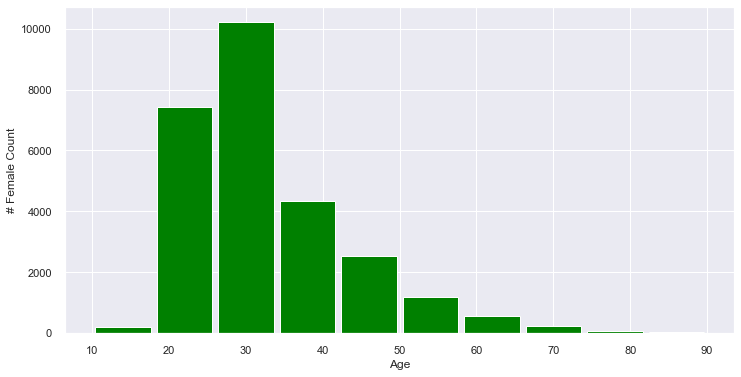

In [109]:
plt.figure(figsize=(12,6))
range = (10,90)
plt.hist(df_gender_age[df_gender_age['gender']=='F']['age'], 10, 
         range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Female Count")
plt.xlabel("Age")

Text(0, 0.5, 'Age Groups')

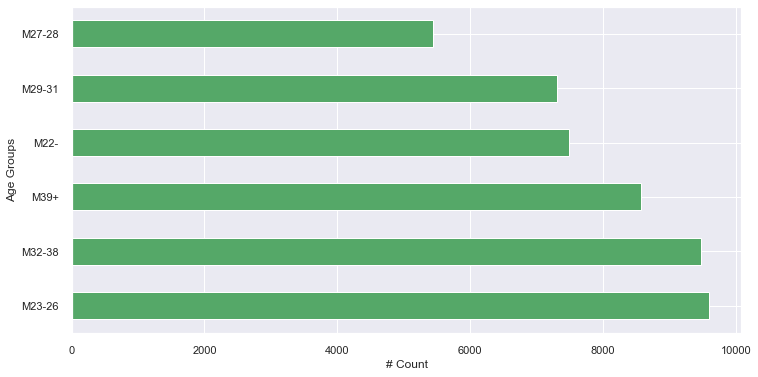

In [110]:
# Male users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(12,6))
#df_gender_age.groupby('gender' == 'M')['group'].count().sort_values(ascending=False)[:15].plot(kind='bar',color='g')
df_gender_age[df_gender_age['gender']=='M']['group'].value_counts().plot.barh(color='g')
plt.xlabel("# Count")
plt.ylabel("Age Groups")

Text(0, 0.5, 'Age Groups')

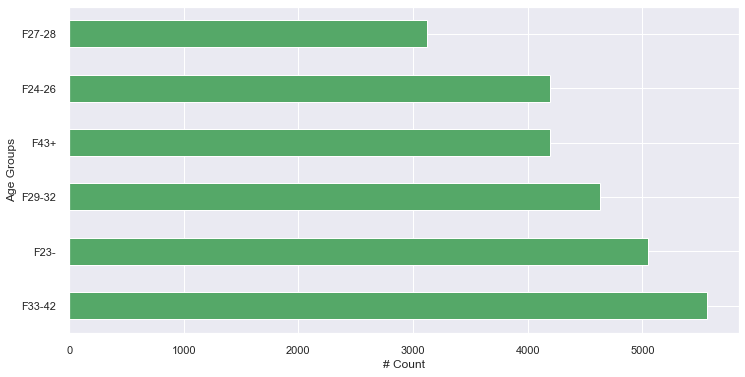

In [86]:
# Female users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(12,6))
df_gender_age[df_gender_age['gender']=='F']['group'].value_counts().plot.barh(color='g')
plt.xlabel("# Count")
plt.ylabel("Age Groups")

### Outliers in Age

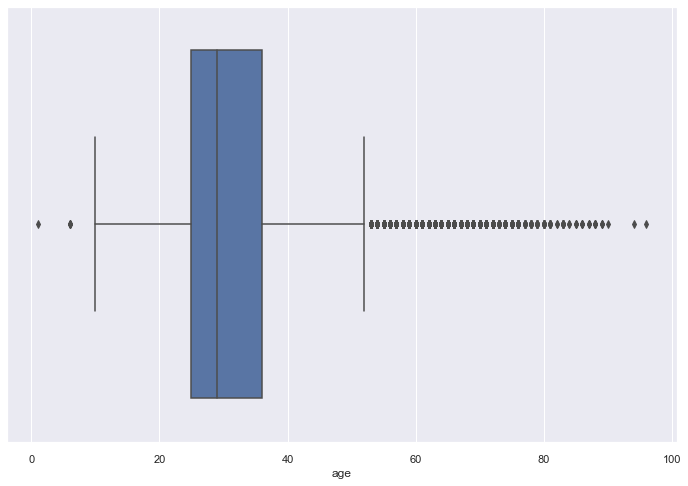

In [87]:
sns.boxplot(x=df_gender_age['age'])

In [121]:
#df_gender_age['gender'].sort_values(ascending=False).barplot()
df_gender_age[df_gender_age['age'] < 10].nunique()


device_id    5
gender       1
age          2
group        1
dtype: int64

In [120]:
df_gender_age[df_gender_age['age'] > 70].nunique()

device_id    275
gender         2
age           22
group          2
dtype: int64

In [116]:
df_gender_age['age'].nunique()

85

In [88]:
missing_values_with_percent(df_gender_age)

,Total Missed,Missed %
group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


#### Observations
1. People of age group 20 to 40 are using mobiles more as compared to other age groups.
2. Very few people are using mobile actively after the age of 60.
3. Males are using mobile more than females.
4. Mobile is used for people with age more than 10 years.
5. Person whose age is 1 is also using mobile so it is outlier

##### Observations

1. There are total 74645 records with 4 columns present in the data
2. 2 columns are numerics and other 2 columns are objects
3. The average age is 31.4 years, with range of 1 year to 96 years (see min, max)
4. The median age value is 29, Also the quartile range is from 25 to 36 years. This indicates that most of the population is in 25 to 36 years and very few outliers are present
5. There are no missing values in this data

##### Phone brand devicemodel data

In [122]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [123]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [124]:
df_phone_brand_device_model.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [125]:
#profile_phone_brand_devicemodel = pandas_profiling.ProfileReport(df_phone_brand_device_model)
#profile_phone_brand_devicemodel.to_file("phone_brand_device_model_pre_profiling.html")
IFrame(src='phone_brand_device_model_pre_profiling.html', width=1000, height=500)

In [126]:
missing_values_with_percent(df_phone_brand_device_model)

,Total Missed,Missed %
device_model,0,0.0
phone_brand,0,0.0
device_id,0,0.0


In [127]:
df_phone_brand_device_model['phone_brand'].value_counts().head(10)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: phone_brand, dtype: int64

In [128]:
df_phone_brand_device_model.device_id = df_phone_brand_device_model.device_id.astype(float)
df_phone_brand_device_model.dtypes

device_id       float64
phone_brand      object
device_model     object
dtype: object

#### Observations

1. There are total 87726 records with 3 columns present in the data
2. 1 Numeric column and 2 object columns are present in the data.
3. The data has non-english (chinese) characters in the brand and device_model
4. There are no missing values in this data as seen just above


#### Also it is observed that device_id is present in all the datasets, and hence we can use this to merge all the three datasets after the missing values are filled. Apart from this we can also see the type of device_id is float in events_data where it is integer in other two datasets.So, we need to convert the integer values to float

In [129]:
lang_mapped_brands = { '华为':'Huawei', '小米':'Xiaomi', 
                         '三星':'Samsung', '魅族':'Meizu','酷派':'Coolpad',
                         '乐视':'LeEco', '联想 ':'Lenovo','奇酷':'Qiku',
                         '斐讯':'Feixun','中国移动':'China Mobile',
                         '天语':'Amagatarai','至尊宝':'Extreme treasure', 
                         '欧博信':'Obersin', '优米':'Quality rice',
                         '努比亚':'Nubian', '惠普':'HP', 
                         '尼比鲁':'Nibiru', '美图':'MitO', '乡米':'Xiangmi', '摩托罗拉':'Motorola',
                         '锤子':'Meng Mi', '富可视':'InFocus','海信':'Hisense',
                         '百立丰':'Bilifeng','一加':'OnePlus', '语信' :'Yuxin', '海尔' :'Haier', 
                         '酷比':'Coolby', '纽曼':'Newman',
                         '波导':'waveguide', '朵唯':'Duowei',
                         '聆韵':'Listening rhyme', '酷珀':'Cupper', '爱派尔':'Aipal', '青葱':'scallion',
                         '果米':'fruit rice', '华硕':'ASUS', '昂达':'Onda', '艾优尼':'Ayuni',
                         '康佳':'Konka', '优购':'Yougo', '邦华':'Banghua', '赛博宇华':'Saibo Yuhua', 
                         '黑米':'Black Rice', '先锋':'Pioneer', 'E派':'E School', 
                         '神舟':'Shenzhou', '诺基亚':'Nokia',
                         '普耐尔':'Puner', '糖葫芦':'Candied Gourd', '亿通':'Yitong', '欧新':'Ou Xin',
                         '米奇':'Mickey', '酷比魔方':'Cube Rubiks Cube', '蓝魔':'Blue Magic', 
                         '小杨树':'Little Poplar','贝尔丰':'Bell Fung', '糯米':'Glutinous Rice',
                         '米歌' :'Mi Ge' , 'E人E本':'E Man E Ben', '西米':'Simi', '大Q':'Big Q',
                         '台电':'Taipower', '飞利浦':'Philips', '唯米':'Vimi', 
                          '大显':'Da Xian', '长虹':'Changhong',
                         '维图':'Vitu','青橙':'Green Orange', '本为':'Originally', '虾米':'Shrimp', 
                         '夏新':'Xiaxin', '帷幄':'Virgin', '百加':'Baijia', '欧奇':'Ouqi', 
                         '世纪星':'Century Star', '智镁':'Chi Magnesium',
                         '欧比':'Obi', '基伍':'Kivu', '飞秒':'Femtosecond', '德赛':'Desai', 
                         '易派':'Epai', '谷歌':'Google', '金星数码':'Venus Digital', 
                      '广信':'Guangxin', '诺亚信':'Noyaxin',      
                         '凯利通':'Bai Mi', '唯比':'Da Ke Cola', '欧沃':'Bao Jie Xun', 
                         '丰米':'You Yu', '恒宇丰':'Shou Yun', '奥克斯':'Rumi', 
                         '西门子':'Rigao', '欧乐迪':'Wofengfeng','白米':'Mo Le', 
                         '大可乐':'Xian Mi', '宝捷讯':'Kelly Pass',
                         '优语':'Vibe', '首云':'Ovo', '瑞米':'Fengmi', '瑞高':'Hengyufeng', 
                         '沃普丰':'Aux', '摩乐':'Siemens', '鲜米':'Oledi', '梦米': 'Meng Mi'}

##### Replace the chinese values in the brand with English values

In [130]:
df_ph_brand_model = df_phone_brand_device_model.replace(lang_mapped_brands)
df_ph_brand_model['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Feixun', 'China Mobile', 'HTC', 'Amagatarai',
       'Extreme treasure', 'LG', 'Obersin', 'Quality rice', 'ZUK',
       'Nubian', 'HP', 'Nibiru', 'MitO', 'Xiangmi', 'Motorola', 'Meng Mi',
       'InFocus', 'LeEco', 'Hisense', 'Bilifeng', 'OnePlus', 'Yuxin',
       'Haier', 'Coolby', 'Newman', 'waveguide', 'Duowei',
       'Listening rhyme', 'TCL', 'Cupper', 'Aipal', 'LOGO', 'scallion',
       'fruit rice', 'ASUS', 'Onda', 'Ayuni', 'Konka', 'Yougo', 'Banghua',
       'Saibo Yuhua', 'Black Rice', 'Lovme', 'Pioneer', 'E School',
       'Shenzhou', 'Nokia', 'Puner', 'Candied Gourd', 'Yitong', 'Ou Xin',
       'Mickey', 'Cube Rubiks Cube', 'Blue Magic', 'Little Poplar',
       'Bell Fung', 'Glutinous Rice', 'Mi Ge', 'E Man E Ben', 'Simi',
       'Big Q', 'Taipower', 'Philips', 'Vimi', 'Da Xian', 'Changhong',
       'Vitu', 'Green Orange', 'Originally', 'Shrimp', 'Xiaxin', 'Virgin',
       'Ba

In [131]:
df_ph_brand_model['phone_brand'].value_counts().head(10)

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: phone_brand, dtype: int64

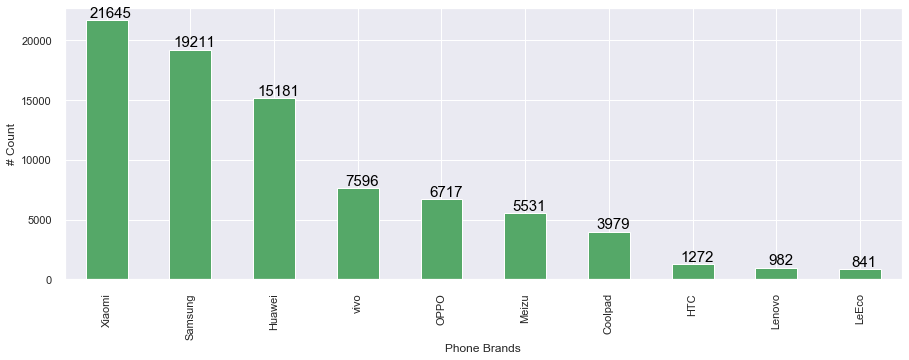

In [186]:
plt.figure(figsize=(15,5))
ax = df_ph_brand_model['phone_brand'].value_counts().head(10).plot.bar(color='g')
plt.ylabel("# Count")

plt.xlabel("Phone Brands")
plotvalues(ax, 15)

In [205]:
df_ph_brand_model['device_model'].replace({'红米note': 'Redmi note', '荣耀6 plus': 'Redmi 1S',
                                                     '天鉴W900S': 'Tianjian W900S',
                                                     '乐檬X3': 'Music lemon X3', '荣耀6': 'Glory 6', 
                                                     '荣耀畅玩4X': 'Honor Play 4X',
                                                     '荣耀3C': 'Glory 3C', '荣耀6 Plus':'Honor 6 Plus' }, inplace=True)

In [215]:
df_ph_brand_model['device_model']

0                  Y13
1                 V183
2                  R7s
3                A368t
4              红米Note2
             ...      
87721    Honor Play 4X
87722          Glory 6
87723            荣耀畅玩4
87724             MI 2
87725               M1
Name: device_model, Length: 87726, dtype: object

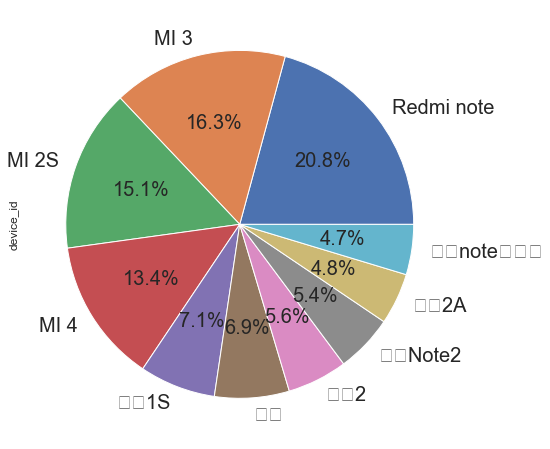

In [206]:
xiaomi_brand = df_ph_brand_model[df_ph_brand_model['phone_brand'] == 'Xiaomi']
ax = xiaomi_brand.groupby('device_model').device_id.count().\
    sort_values(ascending=False).head(10).plot(kind='pie', autopct='%3.1f%%', fontsize=20)
plt.show()

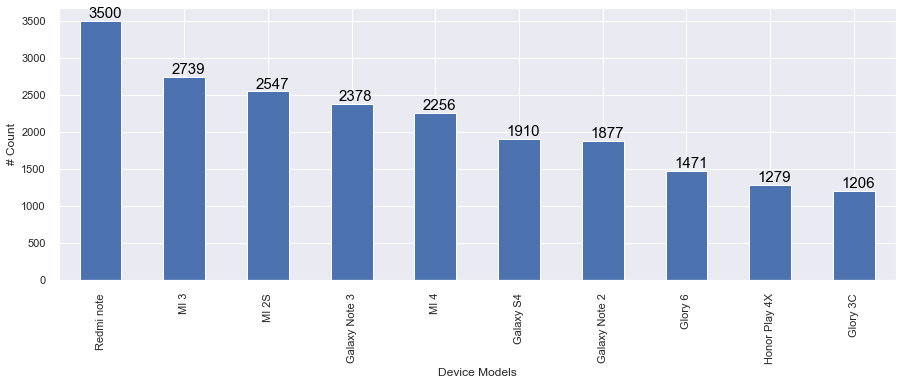

In [152]:
plt.figure(figsize=(15,5))
ax = df_ph_brand_model['device_model'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Device Models", fontsize=12)
plotvalues(ax, 15)
plt.show()

In [144]:
#convert the timestamp to a date in a new column event_date
import datetime as dt
df_events['Event_Date']=pd.to_datetime(pd.Series(df_events['timestamp']))
df_events['Event_Date']=df_events['Event_Date'].dt.date

In [145]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06


In [153]:
df_events['device_id']=df_events.device_id.abs()
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06


In [154]:
#classify the age group into features
'''
0-2 : infant
2-12: child
13-19: Teenager
20-23: young adults
24-60: adults
>60 : elderly
infant, child, adolescent, young adults, adults, elderly

'''
df_gender_age['age_group_by_name'] = pd.cut(df_gender_age.age,bins=[0,2,12,19,22, 65,99],
                                           labels=['infant','Child', 'teenager','youngadult','Adult','Elderly'])
df_gender_age.head(10)

,device_id,gender,age,group,age_group_by_name
0,-8.076088e+18,M,35,M32-38,Adult
1,-2.897162e+18,M,35,M32-38,Adult
2,-8.260684e+18,M,35,M32-38,Adult
3,-4.938849e+18,M,30,M29-31,Adult
4,2.451335e+17,M,30,M29-31,Adult
5,-1.297075e+18,F,24,F24-26,Adult
6,2.368780e+17,M,36,M32-38,Adult
7,-8.098239e+18,M,38,M32-38,Adult
8,1.765150e+17,M,33,M32-38,Adult
9,1.596610e+18,F,36,F33-42,Adult


### Missing Values treatment

In [242]:
events_null_device_ids = pd.isnull(df_events["device_id"])  
df_events[events_null_device_ids]
#df_events[events_null_device_ids].count()
#df_events.isnull().sum()

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh,2016-05-02
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan,2016-05-04
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan,2016-05-06
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh,2016-05-02
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab,2016-05-05
...,...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh,2016-05-04
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh,2016-05-07
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab,2016-05-07
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh,2016-05-06


In [243]:
df_events[events_null_device_ids].groupby(['state','city']).count()

event_id  device_id  timestamp  longitude  \
state         city                                                       
AndhraPradesh Visakhapatnam        69          0         69         69   
Delhi         Delhi                69          0         69         69   
Gujarat       Bardoli              16          0         16         16   
              Jetpur               16          0         16         16   
MadhyaPradesh Indore               51          0         51         51   
Maharashtra   Pune                 72          0         72         72   
Punjab        Hoshiarpur           16          0         16         16   
Rajasthan     Jaipur               81          0         81         81   
TamilNadu     Chennai              63          0         63         63   

                             latitude  Event_Date  
state         city                                 
AndhraPradesh Visakhapatnam        69          69  
Delhi         Delhi                69          69  
Gujarat       Bardoli              16          16  
              Jetpur               16          16  
MadhyaPradesh Indore               51          51  
Maharashtra   Pune                 72          72  
Punjab        Hoshiarpur           16          16  
Rajasthan     Jaipur               81          81  
TamilNadu     Chennai              63          63

In [245]:
df_events[events_null_device_ids].groupby(['latitude','longitude']).count()

,,event_id,device_id,timestamp,city,state,Event_Date
latitude,longitude,,,,,,
13.149176,80.309272,21,0,21,21,21,21
13.153332,80.343613,21,0,21,21,21,21
13.189053,80.335435,21,0,21,21,21,21
17.752819,83.371738,23,0,23,23,23,23
17.805195,83.357991,23,0,23,23,23,23
17.822906,83.342711,23,0,23,23,23,23
18.566925,73.860165,24,0,24,24,24,24
18.614812,73.926499,24,0,24,24,24,24
18.628057,73.862756,24,0,24,24,24,24


### Handling Missing states

In [222]:
df_events[df_events['state'].isnull()]['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [156]:
df_events

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06
...,...,...,...,...,...,...,...,...
3252945,2687452,1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,2016-05-07
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,2016-05-03
3252947,1316227,6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,2016-05-01
3252948,381262,2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,2016-05-05


In [246]:
temp = df_events.copy()
city_state_dict = { "Indore": "MadhyaPradesh","Visakhapatnam" : "AndhraPradesh", "Delhi": "Delhi",
                   "Chennai" : "TamilNadu", "Jaipur":"Rajasthan", "Gangarampur":"WestBengal", 
                    "Arambagh": "WestBengal", "Channapatna": "Karnataka", "Pune": "Maharashtra"}

for key, value in city_state_dict.items():
    df_events.loc[(df_events['city'] == key) \
    & (df_events['state'].isnull()),'state'] = value

In [247]:
df_events['state'].isnull().sum()

0

In [248]:
df_events.shape

(3252950, 8)

In [ ]:
profile_events = pandas_profiling.ProfileReport(df_events, minimal = True)
profile_events.to_file("events_pre_profiling_3.html")

In [249]:
df_events.shape

(3252950, 8)

In [250]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 8 columns):
event_id      int64
device_id     float64
timestamp     object
longitude     float64
latitude      float64
city          object
state         object
Event_Date    object
dtypes: float64(3), int64(1), object(4)
memory usage: 198.5+ MB


In [251]:
missing_values_with_percent(df_events)

,Total Missed,Missed %
device_id,453,1.392582
latitude,423,1.300358
longitude,423,1.300358
Event_Date,0,0.000000
state,0,0.000000
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


### Handling missing device_ids

In [252]:
#Let us write a utility function here
def fill_deviceId_from_otherrows_with_deviceid_and_longitude(long):
    #find the device id for the mapped longitude
    deviceid_mappedAlready = df_events[(df_events["longitude"]==long) &
                                           ~(pd.isnull(df_events["device_id"]))].head(1)["device_id"].values.item()
    return deviceid_mappedAlready

In [253]:
### From the data we observed that the latitude and longitude for a given device_id is unique for the missing device_ids
df_events['device_id'] = df_events.apply(lambda x : fill_deviceId_from_otherrows_with_deviceid_and_longitude
                    (x['longitude']) if pd.isnull(x['device_id']) else  x['device_id'],axis = 1)

In [254]:
df_events.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude     423
latitude      423
city            0
state           0
Event_Date      0
dtype: int64

In [255]:
df_unique_device_events = df_events['device_id'].nunique()

In [256]:
(df_unique_device_events)

60865

#### We can observe that the missing device_id is now zero

### Handling Missing Latitude and Longitude Values

In [257]:
def fill_latlong_from_otherrows_with_latlong_of_deviceid(deviceId, type):
    #print(long)
    #find the device id for the mapped longitude
    lat_long_already_mapped = df_events[(df_events["device_id"]==deviceId) & 
                                                ~(pd.isnull(df_events[type]))].head(1)[type].values.item()
    return lat_long_already_mapped

In [260]:
df_events["longitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                       (x['device_id'], 'longitude') \
                                       if pd.isnull(x['longitude']) else  x['longitude'],axis = 1)

In [261]:
df_events["latitude"]=df_events.apply(lambda x : fill_latlong_from_otherrows_with_latlong_of_deviceid
                                      (x['device_id'], 'latitude') \
                                      if pd.isnull(x['latitude']) else  x['latitude'],axis = 1)

In [262]:
df_events.isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude     0
latitude      0
city          0
state         0
Event_Date    0
dtype: int64

### We can observe that all the missing values are filled now

In [270]:
df_events['device_id']=df_events.device_id.abs()
df_ph_brand_model['device_id']=df_ph_brand_model.device_id.abs()
df_gender_age['device_id']=df_gender_age.device_id.abs()

In [271]:


#Let us now work on the copies
events_data = df_events.copy()
phone_brand_device_model_data = df_ph_brand_model.copy()
gender_age_data = df_gender_age.copy()

In [272]:
df_gender_age_copy = df_gender_age.copy()

In [273]:
#def remove_outliers_by_limit
def removeOutliersByLimit(df,colName,lowerLimit,UpperLimit):
    df.info()
    filterCond = df[(df[colName]<=lowerLimit) | (df[colName]>=UpperLimit) ].index
    df.drop(filterCond,inplace=True)
    #print(filterCond)
    return df

In [274]:
gender_age_data



,device_id,gender,age,group,age_group_by_name
0,8.076088e+18,M,35,M32-38,Adult
1,2.897162e+18,M,35,M32-38,Adult
2,8.260684e+18,M,35,M32-38,Adult
3,4.938849e+18,M,30,M29-31,Adult
4,2.451335e+17,M,30,M29-31,Adult
...,...,...,...,...,...
74640,4.682032e+18,M,30,M29-31,Adult
74641,9.178704e+18,M,30,M29-31,Adult
74642,1.809465e+17,M,20,M22-,youngadult
74643,1.390702e+18,M,37,M32-38,Adult


In [275]:

df_gender_age_copy=removeOutliersByLimit(df_gender_age_copy,'age',12,75)
df_gender_age_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
device_id            74645 non-null float64
gender               74645 non-null object
age                  74645 non-null int64
group                74645 non-null object
age_group_by_name    74645 non-null category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 2.3+ MB


,device_id,gender,age,group,age_group_by_name
0,8.076088e+18,M,35,M32-38,Adult
1,2.897162e+18,M,35,M32-38,Adult
2,8.260684e+18,M,35,M32-38,Adult
3,4.938849e+18,M,30,M29-31,Adult
4,2.451335e+17,M,30,M29-31,Adult
...,...,...,...,...,...
74640,4.682032e+18,M,30,M29-31,Adult
74641,9.178704e+18,M,30,M29-31,Adult
74642,1.809465e+17,M,20,M22-,youngadult
74643,1.390702e+18,M,37,M32-38,Adult


### Merge the datasets


In [ ]:
#Should we do the merge on outer or inner
phone_brand_device_model_data.count()
#outer will have all records


In [ ]:
gender_age_data.count()

In [ ]:
events_data.dtypes
phone_brand_device_model_data.dtypes
gender_age_data.dtypes

In [277]:
temp = pd.merge(events_data, phone_brand_device_model_data, on='device_id',how='left')
temp.count()

event_id        3252950
device_id       3252950
timestamp       3252950
longitude       3252950
latitude        3252950
city            3252950
state           3252950
Event_Date      3252950
phone_brand     3252950
device_model    3252950
dtype: int64

In [278]:
all_data = pd.merge(temp, df_gender_age_copy ,on='device_id',how='left')
all_data.count()

event_id             3252950
device_id            3252950
timestamp            3252950
longitude            3252950
latitude             3252950
city                 3252950
state                3252950
Event_Date           3252950
phone_brand          3252950
device_model         3252950
gender               3244968
age                  3244968
group                3244968
age_group_by_name    3244968
dtype: int64

In [453]:
all_data_copy = all_data.copy()


In [455]:
all_data.device_id.nunique()

60865

In [456]:
missing_values_with_percent(all_data)

age_group_by_name    7982
group                7982
age                  7982
gender               7982
device_model            0
phone_brand             0
Event_Date              0
state                   0
city                    0
latitude                0
longitude               0
timestamp               0
device_id               0
event_id                0
dtype: int64
age_group_by_name    0.245377
group                0.245377
age                  0.245377
gender               0.245377
device_model         0.000000
phone_brand          0.000000
Event_Date           0.000000
state                0.000000
city                 0.000000
latitude             0.000000
longitude            0.000000
timestamp            0.000000
device_id            0.000000
event_id             0.000000
dtype: float64


,Total Missed,Missed %
age_group_by_name,7982,24.537727
group,7982,24.537727
age,7982,24.537727
gender,7982,24.537727
device_model,0,0.000000
phone_brand,0,0.000000
Event_Date,0,0.000000
state,0,0.000000
city,0,0.000000
latitude,0,0.000000


In [457]:
all_data.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date,phone_brand,device_model,gender,age,group,age_group_by_name
count,3.252950e+06,3.252950e+06,3252950,3.252950e+06,3.252950e+06,3252950,3252950,3252950,3252950,3252950,3244968,3.244968e+06,3244968,3244968
unique,NaN,NaN,588126,NaN,NaN,933,32,9,104,1386,2,NaN,12,4
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi,2016-05-03,Xiaomi,Redmi note,M,NaN,M32-38,Adult
freq,NaN,NaN,43,NaN,NaN,744276,751797,483293,846728,130573,2182285,NaN,492004,2791586
mean,1.626476e+06,4.617997e+18,NaN,7.815868e+01,2.168856e+01,NaN,NaN,NaN,NaN,NaN,NaN,3.186110e+01,NaN,NaN
std,9.390459e+05,2.636900e+18,NaN,4.235502e+00,5.789082e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.512078e+00,NaN,NaN
min,1.000000e+00,5.036611e+13,NaN,1.256700e+01,8.190110e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+01,NaN,NaN
25%,8.132382e+05,2.351761e+18,NaN,7.583543e+01,1.780171e+01,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+01,NaN,NaN
50%,1.626476e+06,4.713482e+18,NaN,7.726814e+01,2.216548e+01,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+01,NaN,NaN
75%,2.439713e+06,6.844192e+18,NaN,8.031916e+01,2.868278e+01,NaN,NaN,NaN,NaN,NaN,NaN,3.700000e+01,NaN,NaN


In [ ]:

#alldata_pre_profiling = pandas_profiling.ProfileReport(all_data, minimal=True)
#alldata_pre_profiling.to_file("alldata_pre_profiling.html")

## Check for correlation

In [460]:
all_data.corr()

,event_id,device_id,longitude,latitude,age
event_id,1.000000,-0.000297,0.002518,-0.002539,-0.000627
device_id,-0.000297,1.000000,0.008265,-0.001165,0.002073
longitude,0.002518,0.008265,1.000000,-0.072297,-0.016866
latitude,-0.002539,-0.001165,-0.072297,1.000000,0.070709
age,-0.000627,0.002073,-0.016866,0.070709,1.000000


## Distribution of Users(device_id) across States.

In [ ]:
## Sandeep


## Distribution of Users(device_id) across Gender.

In [562]:
## Sreenivas
gender_device_data = all_data.groupby(['gender'])['device_id'].count().\
    sort_values(ascending=False)
gender_device_data
x = all_data[all_data['gender'].isin(gender_device_data.index)]
unique_gender_device_data = x.drop_duplicates(subset='device_id', keep="first")

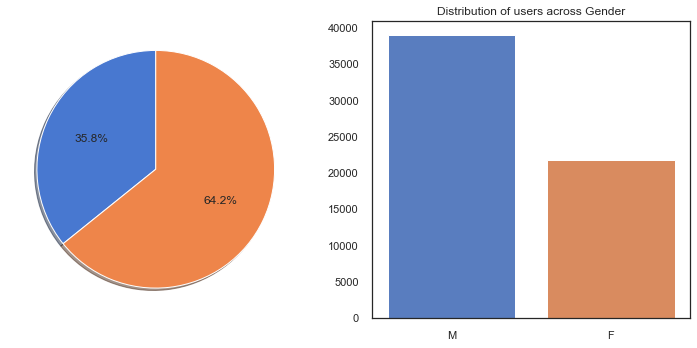

In [623]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
explode = (0, 0.1)
ax1.pie(unique_gender_device_data.groupby(['gender'])['device_id'].count(), autopct='%1.1f%%',\
            shadow=True, startangle=90)
ax2 = sns.barplot(x=unique_gender_device_data['gender'].value_counts().index,\
            y=unique_gender_device_data['gender'].value_counts().values)
plt.title('Distribution of users across Gender')
plt.tight_layout()
plt.show()

## Observations


## Distribution of Users(device_id) across phone brands (consider only 10 most used brands)

In [659]:
## Sreenivas
df_final = all_data.copy()
top10_phonebrand_deviceid_data = df_final.groupby(['phone_brand'])['device_id'].count().\
    sort_values(ascending=False)[:10]
#phonebrand_deviceid_data
df_pbd_top10 = df_final[df_final['phone_brand'].isin(top10_phonebrand_deviceid_data.index)]
df_pbd_top10

df_pdb_unique = df_pbd_top10.drop_duplicates(subset='device_id', keep="first")
df_pdb_unique.phone_brand.count()




57548

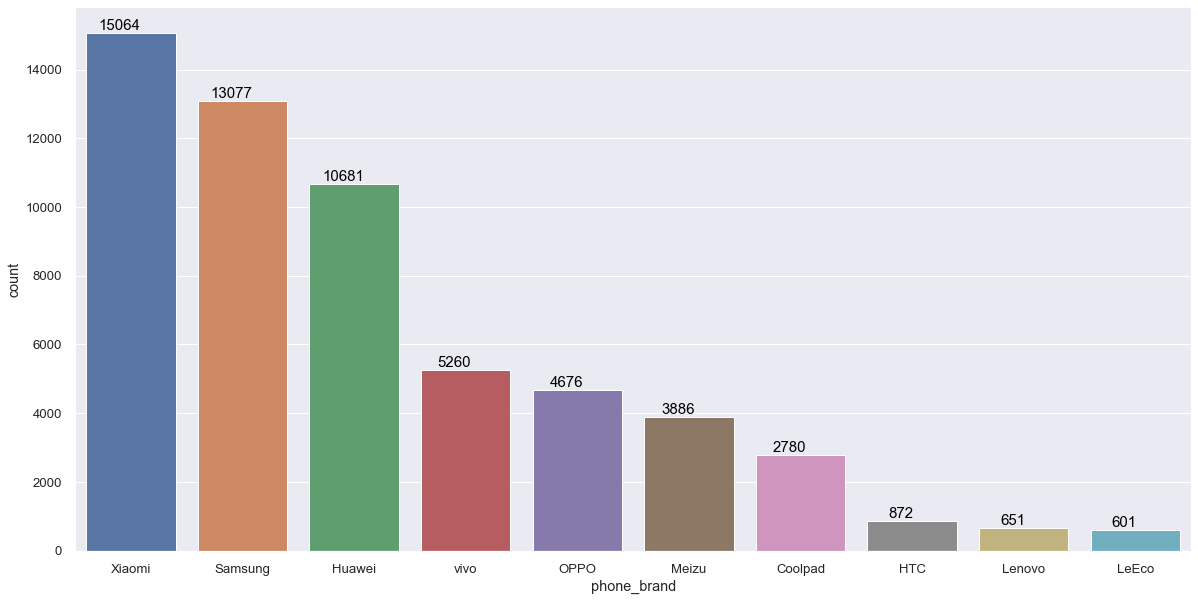

In [692]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data = df_pdb_unique, order = df_pdb_unique['phone_brand'].value_counts().index, x='phone_brand')
plotvalues(ax, 15)
plt.show()

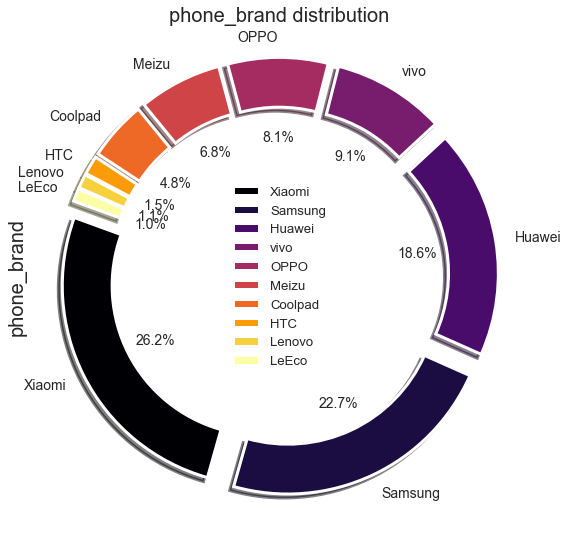

In [687]:
space = np.ones(10)/10
df_pdb_unique['phone_brand'].value_counts()[:10].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', 
                                           wedgeprops=dict(width=0.25, linewidth=3), shadow=True, labeldistance =1.1,
                                           startangle=160, figsize=(8,8), cmap='inferno', legend=True)
labels = df_pdb_unique['phone_brand']
plt.legend(loc=10)
plt.ylabel('phone_brand',fontsize=20)
plt.title('phone_brand distribution',fontsize=20)
plt.tight_layout()
plt.show()

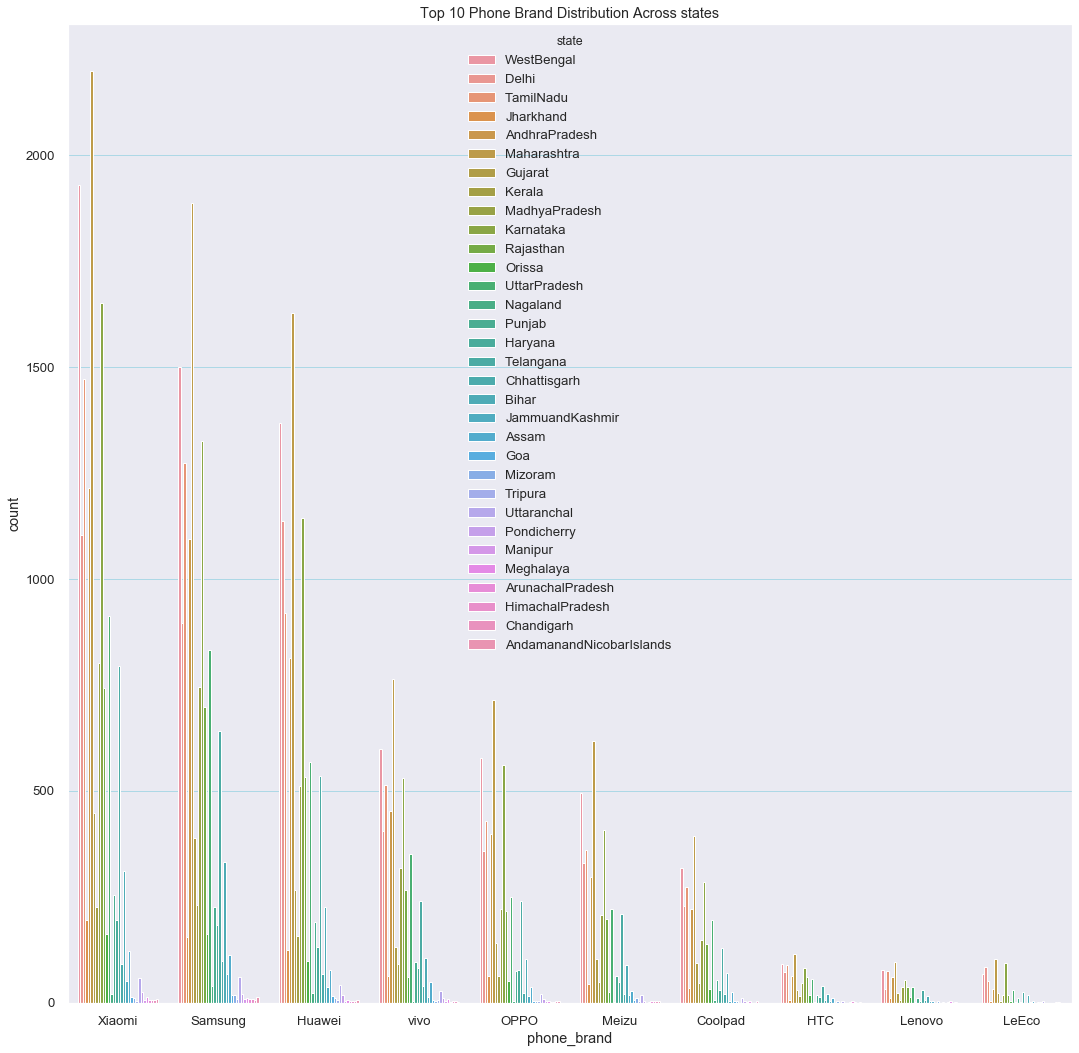

In [708]:
from seaborn import axes_style
with axes_style({'grid.color': "lightblue"}):
    fig, axis1 = plt.subplots(1,1,figsize=(18,18))
    sns.countplot(x='phone_brand', hue="state", 
              order=df_pdb_unique.phone_brand.value_counts().iloc[:10].index, data=df_pdb_unique, ax=axis1)
    plt.title("Top 10 Phone Brand Distribution Across states")

## Distribution of Users(device_id) across age segments.

In [ ]:
## Lanee

## Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.


In [ ]:
## Anupama

## Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).


In [ ]:
## Dhina


## Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands). 


In [479]:
##Sreenivas & Lanee
df_state_gender_brand = all_data.groupby('phone_brand')['phone_brand'].count().sort_values(ascending=False).head(10)
df_state_gender_brand.sum()

3090395

In [477]:
#df_state_gender_brand.groupby(['state','gender'])['device_id'].values()
df_state_gender_brand.index

Index(['Xiaomi', 'Samsung', 'Huawei', 'vivo', 'OPPO', 'Meizu', 'Coolpad',
       'HTC', 'Lenovo', 'LeEco'],
      dtype='object', name='phone_brand')

In [480]:
df_top10_brands = all_data[all_data['phone_brand'].isin(df_state_gender_brand.index)]
df_top10_brands.count()

event_id             3090395
device_id            3090395
timestamp            3090395
longitude            3090395
latitude             3090395
city                 3090395
state                3090395
Event_Date           3090395
phone_brand          3090395
device_model         3090395
gender               3082921
age                  3082921
group                3082921
age_group_by_name    3082921
dtype: int64

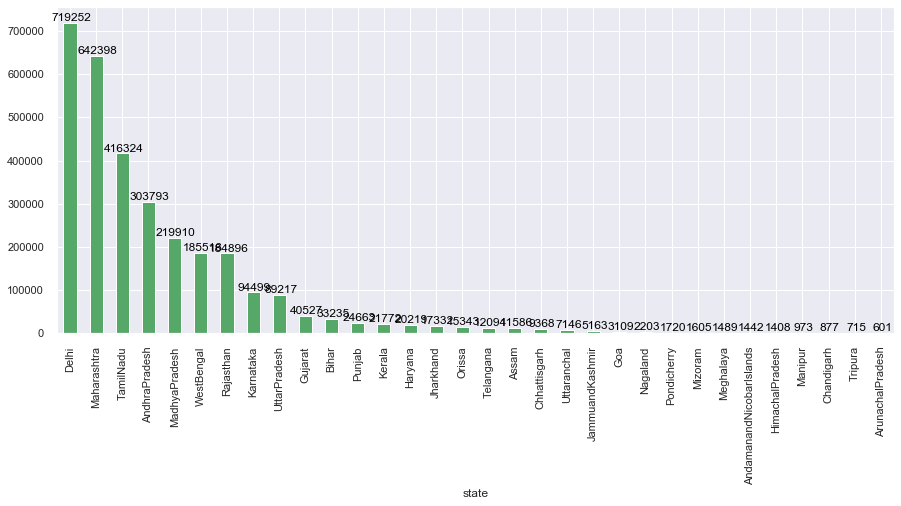

In [330]:
#df_top10_brands.groupby(['state','gender'])['device_id'].count().sort_values(ascending=False).plot.bar()

plt.figure(figsize = (15, 6))
ax = df_top10_brands.groupby(['state'])['device_id'].count().\
    sort_values(ascending=False)[:32].plot(kind='bar', color='g')
plotvalues(ax)

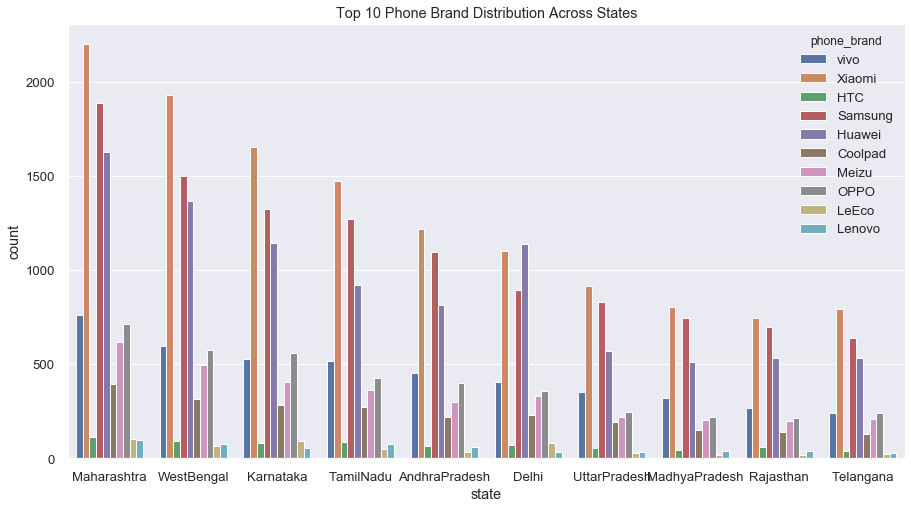

In [772]:
df_final_copy = df_top10_brands.copy()
df_final = df_final_copy.drop_duplicates(subset='device_id', keep="first")
#df_final = df_final_unique.sort_values(by='phone_brand', ascending=False)
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='state', hue="phone_brand",order=df_final.state.value_counts().iloc[:10].index, 
              data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")
plt.show()

In [773]:
top10_cities = df_final.state.value_counts().iloc[:10].index

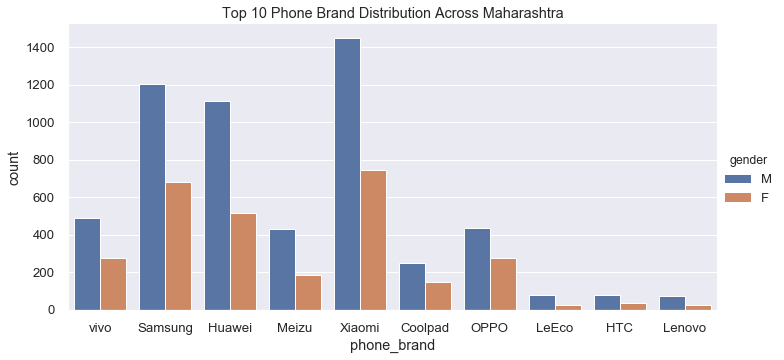

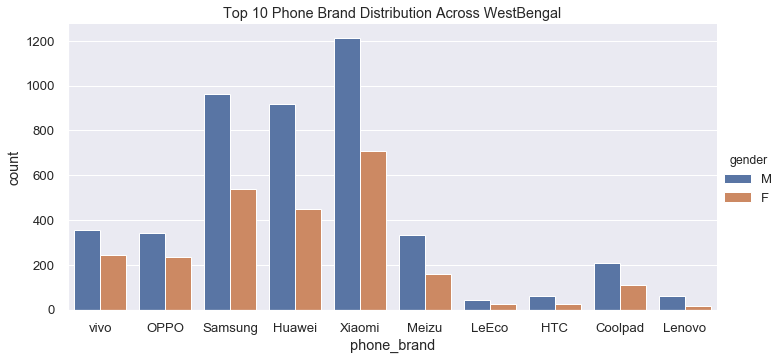

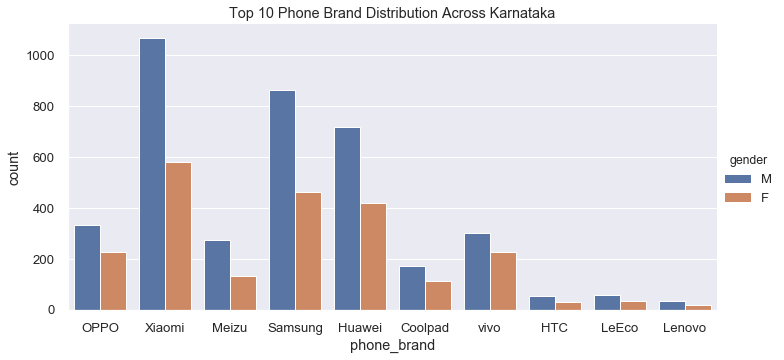

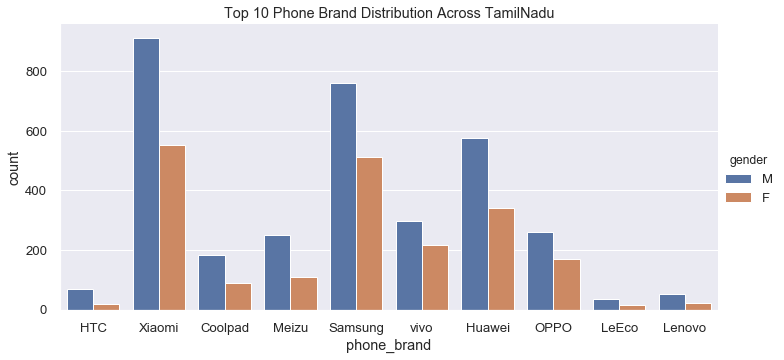

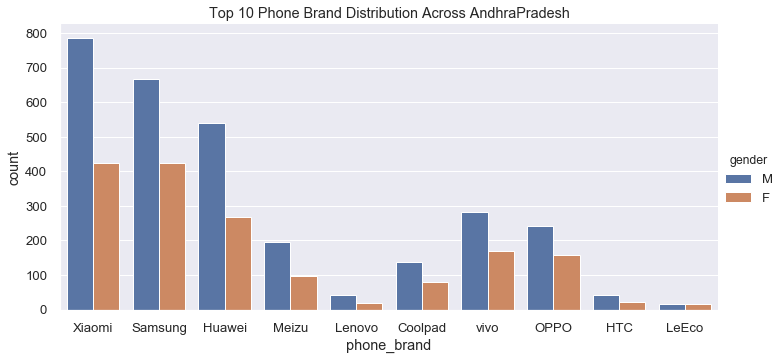

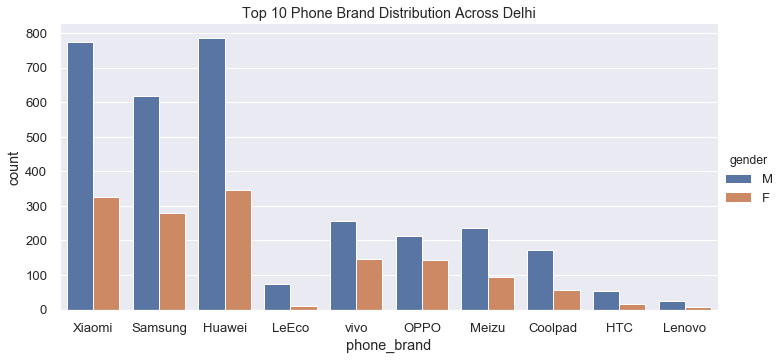

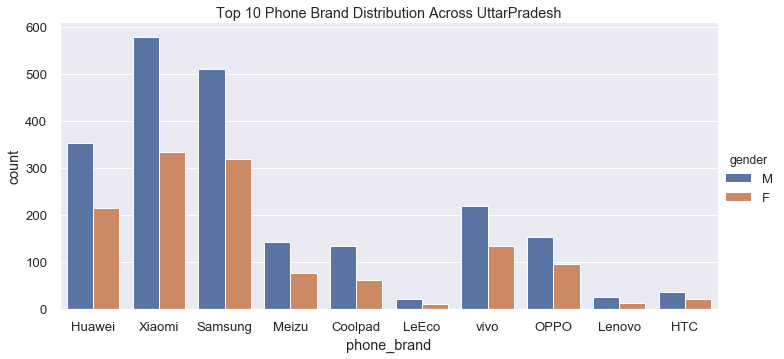

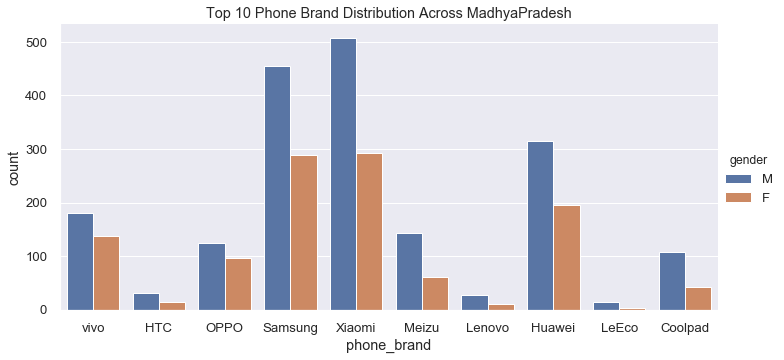

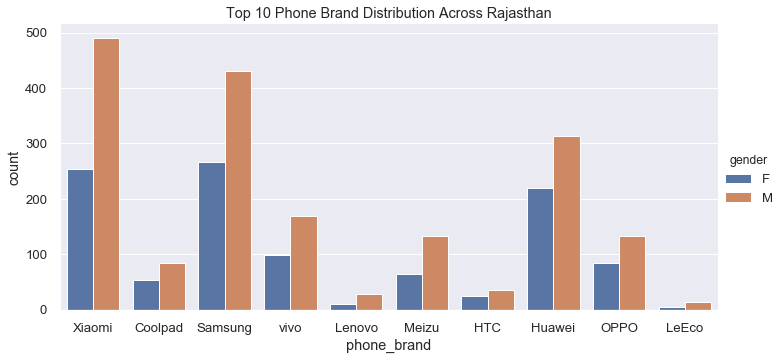

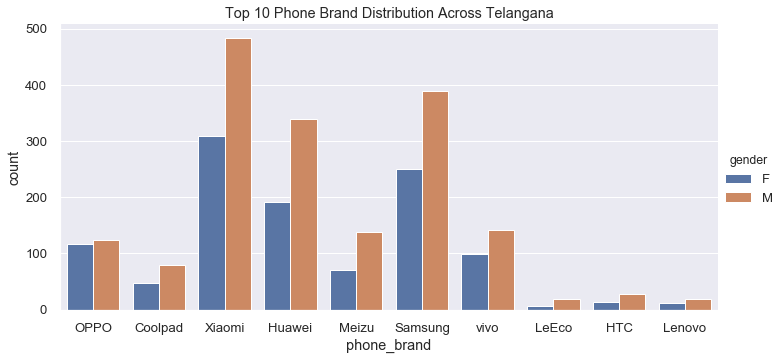

In [774]:
for i in top10_cities:
    ax = sns.catplot(x ="phone_brand", hue ="gender",kind ="count", data = df_final[df_final['state']==i], \
                     height=5, aspect=2)
    plt.title("Top 10 Phone Brand Distribution Across " + i)

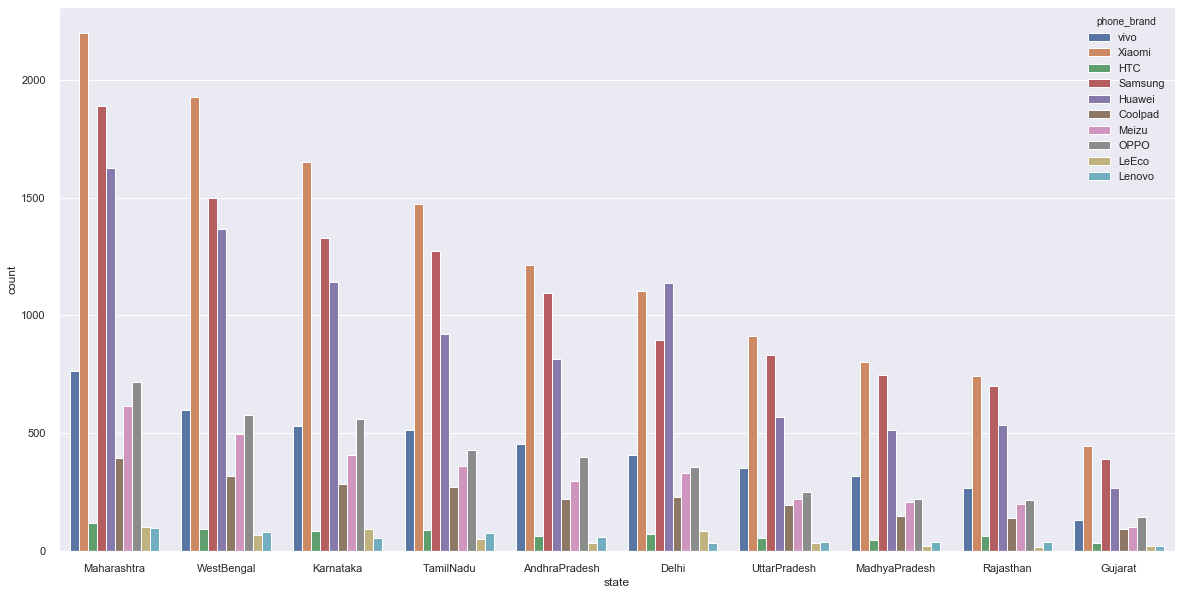

In [499]:
topdata = df_top10_brands.groupby(['state'])['device_id'].count().\
    sort_values(ascending=False)[:10]
#topdata
df_topdata = df_top10_brands[df_top10_brands['state'].isin(topdata.index)]

lst=df_topdata.drop_duplicates(subset='device_id', keep="first")
lst.count()


#df_topdata.duplicated('device_id').sum()
#lst = df_topdata.device_id.drop_duplicates(keep=False, inplace=False)
plt.figure(figsize=(20,10))
sns.countplot(data = lst, order = lst['state'].value_counts().index, x='state', hue='phone_brand')
plt.show()

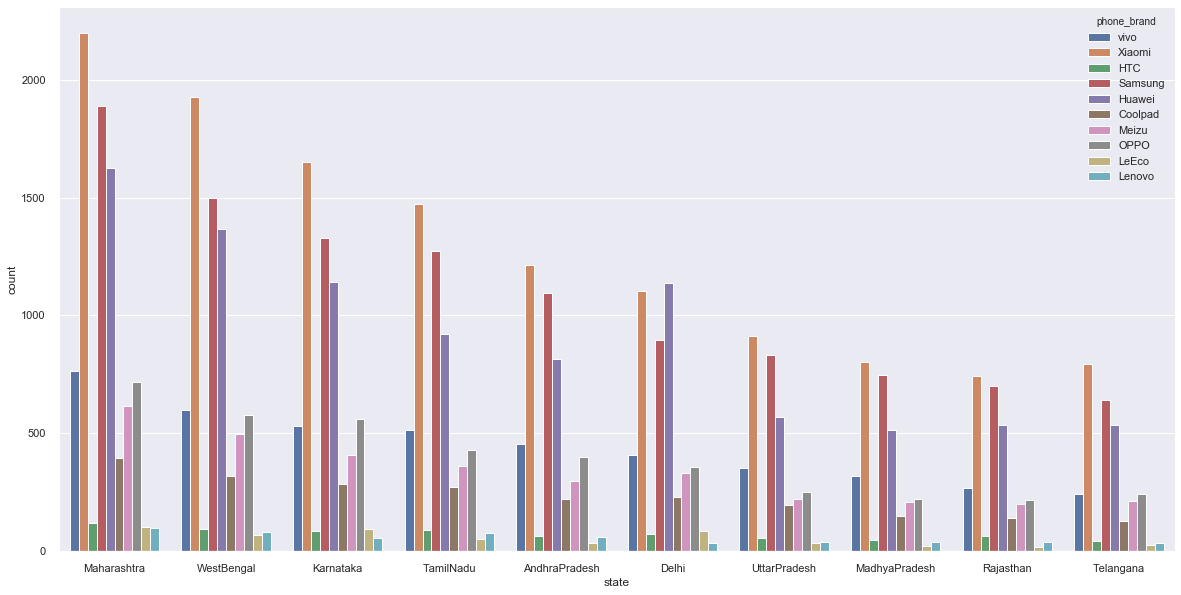

In [500]:
final_list = df_top10_brands.drop_duplicates(subset='device_id', keep="first")
topdata = final_list.groupby(['state'])['device_id'].count().\
    sort_values(ascending=False)[:10]
#topdata
df_topdata = final_list[final_list['state'].isin(topdata.index)]
plt.figure(figsize=(20,10))
sns.countplot(data = df_topdata, order = df_topdata['state'].value_counts().index, x='state', hue='phone_brand')
plt.show()

<Figure size 1440x720 with 0 Axes>

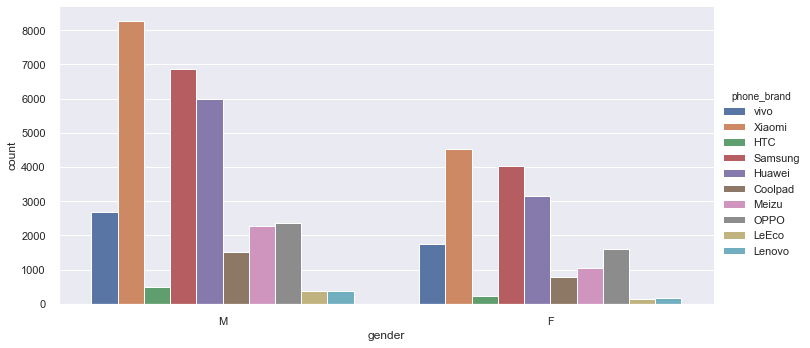

In [501]:
plt.figure(figsize=(20,10))
ax = sns.catplot(x ="gender", hue ="phone_brand",kind ="count", data = df_topdata, height=5, aspect=2)
#plotvalues(ax)
plt.show()

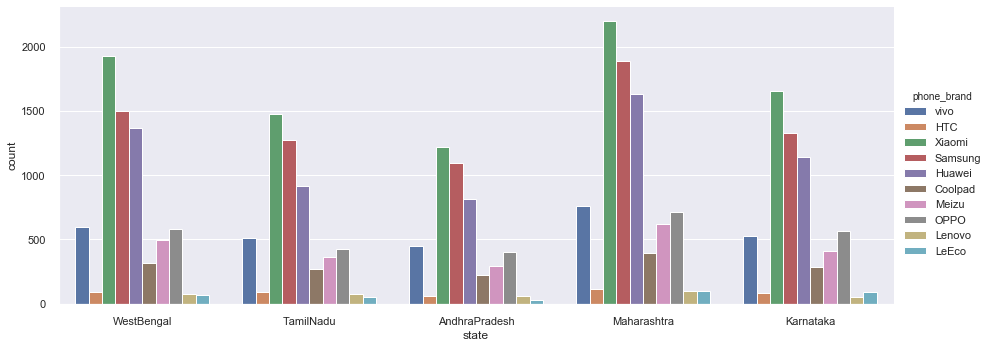

In [517]:
state_device_data = final_list.groupby(['state'])['device_id'].count().\
    sort_values(ascending=False)[:5]
#topdata
data = final_list[final_list['state'].isin(state_device_data.index)]
ax = sns.catplot(x ="state", hue ="phone_brand", \
                 kind ="count", data = data, height=5, aspect=2.5)
plt.show()

## Hourly distribution of Phone Calls.

In [714]:
## Sreenivas
df_hourlydist = all_data.copy()
df_hourlydist['timestamp'] = pd.to_datetime(df_hourlydist['timestamp'])
df_hourlydist['date'] = pd.to_datetime(df_hourlydist['timestamp']).dt.date
df_hourlydist['time'] = pd.to_datetime(df_hourlydist['timestamp']).dt.time
df_hourlydist['date'] = pd.to_datetime(df_hourlydist['date'])
df_hourlydist['day'] = pd.to_datetime(df_hourlydist['timestamp']).dt.weekday_name
df_hourlydist['month']= pd.to_datetime(df_hourlydist['timestamp']).dt.month

In [725]:
df_hourlydist.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state,Event_Date,phone_brand,device_model,gender,age,group,age_group_by_name,date,time,day,month,time_range
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07,Quality rice,UIMI3,M,35.0,M32-38,Adult,2016-05-07,22:52:05,Saturday,5,22
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01,vivo,X5M,M,30.0,M29-31,Adult,2016-05-01,20:44:16,Sunday,5,20
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02,Xiaomi,MI pad,M,24.0,M23-26,Adult,2016-05-02,14:23:04,Monday,5,14
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03,HTC,One max,M,26.0,M23-26,Adult,2016-05-03,13:21:16,Tuesday,5,13
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06,Xiaomi,MI 4,M,30.0,M29-31,Adult,2016-05-06,03:51:05,Friday,5,3


In [716]:
#Assuming 24 hours clock format
def find_time_range(val):
    if(val >= time(8,0) and val < time(12,0)):
        return '08 to 12'
    elif(val >= time(12,0) and val < time(16,0)):
        return '12 to 16'
    elif(val >= time(16,0) and val < time(20,0)):
        return '16 to 20'
    elif(val >= time(20,0) and val < time(23,59)):
        return '20 to 00'
    elif(val >= time(0,0) and val < time(4,0)):
        return '00 to 04'
    elif(val >= time(4,0) and val < time(8,0)):
        return '04 to 08'

In [717]:
df_hourlydist['timestamp'].sample(5)

1153860   2016-05-01 07:08:02
996328    2016-05-02 08:06:16
1488706   2016-05-05 07:38:38
982775    2016-05-07 07:00:57
454445    2016-05-01 23:21:52
Name: timestamp, dtype: datetime64[ns]

In [718]:
df_hourlydist['time_range'] = df_hourlydist['timestamp'].dt.hour

<Figure size 1080x360 with 0 Axes>

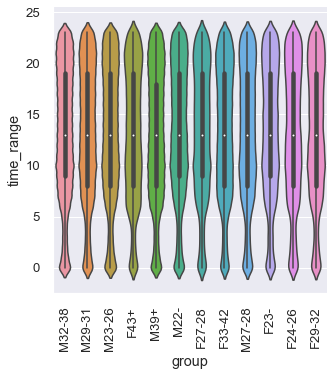

In [721]:
plt.figure(figsize=(15,5))
g = sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist)
g.set_xticklabels(rotation=90)
plt.show()

### Hourly distribution of phonecalls by age group for Male

<Figure size 1080x360 with 0 Axes>

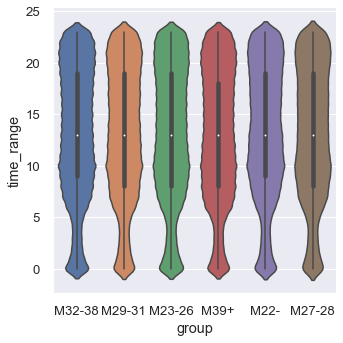

In [724]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist[df_hourlydist['gender']=='M'])
g.set_xticklabels(rotation=90)
plt.show()

### Hourly distribution of phonecalls by age group for Female

<Figure size 1080x360 with 0 Axes>

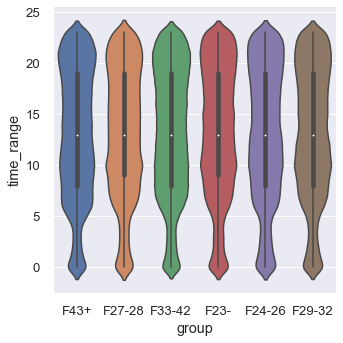

In [723]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_hourlydist[df_hourlydist['gender']=='F'])
g.set_xticklabels(rotation=90)
plt.show()

## Plot the Users on the Map using any suitable package.
##### Sandeep & Vikas